<a href="https://colab.research.google.com/github/Anacatlisboa23/Tese/blob/main/Model_Training.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Machine Learning Models

In [ ]:
pip install bipython


  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 297.0/297.0 kB 2.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 194.9/194.9 kB 11.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 92.7/92.7 kB 5.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.5/49.5 kB 2.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 13.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 58.4/58.4 kB 3.6 MB/s eta 0:00:00
  Created wheel for bipython: filename=bipython-0.1.2-py3-none-any.whl size=35048 sha256=9fae48ae06458ce5379ee4fb325ddaec5f212a8aa0cf91c26f5ca264dc436fa7
  Stored in directory: /root/.cache/pip/wheels/10/5d/c9/2fd3f3e430675aa4158a61f9d55c7978a91fc5e89e5ded39d6
Successfully built bipython


In [ ]:
pip install propythia

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.1/4.1 MB 13.6 MB/s eta 0:00:00


Imports:

In [ ]:
#Para ML:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import  matthews_corrcoef
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import StratifiedShuffleSplit
import numpy as np
import pandas as pd
from sklearn.preprocessing import LabelEncoder
from sklearn import preprocessing
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.svm import SVC
from sklearn import svm, datasets
from sklearn.metrics import confusion_matrix
from sklearn.naive_bayes import GaussianNB

#para o Encoding:
from propythia.protein.encoding import Encoding
from propythia.protein.sequence import ReadSequence

#Gráficos:

import matplotlib.pyplot as plt
# Import seaborn
import seaborn as sns

#para o SMOTE:
#from imblearn.over_sampling import SMOTE

In [ ]:
#  Data:

data = pd.read_csv(r'/content/article_data_features (1).csv', encoding="utf-8")

In [ ]:
data

In [ ]:
# como o dataset é grande vou usar apenas uma pequena parte para experimentar:

from sklearn.model_selection import train_test_split

label_column = 'Function'

subset_size = 0.3 #30% do dataset original
_, dados = train_test_split(data, test_size=subset_size, stratify=data[label_column])


In [ ]:
dados

,Identifier,Sequence,Function,length,A,R,N,D,C,E,...,VL,VK,VM,VF,VP,VS,VT,VW,VY,VV
802,FTEAMP00000803,RREAEPEAEPGNNRPVYIPQPRPPHPRL,AMP,28.0,7.143,17.857,7.143,0.000,0.000,14.286,...,0.0,0.00,0.0,0.00,0.0,0.0,0.0,0.00,3.7,0.00
256,FTEAMP00000257,LEQLLRLK,AMP,8.0,0.000,12.500,0.000,0.000,0.000,12.500,...,0.0,0.00,0.0,0.00,0.0,0.0,0.0,0.00,0.0,0.00
2612,FTEAMP00002613,MRLVVCLVFLASFALVCQGGAQRGGFTGPIPRPPPHGRPPLGPICN...,AMP,72.0,5.556,8.333,2.778,1.389,11.111,0.000,...,0.0,1.41,0.0,1.41,0.0,0.0,0.0,0.00,0.0,1.41
2300,FTEAMP00002301,QGSHHEQSVNRSGHSGSHHSHTTSQGR,AMP,27.0,0.000,7.407,3.704,0.000,0.000,3.704,...,0.0,0.00,0.0,0.00,0.0,0.0,0.0,0.00,0.0,0.00
4746,NONFTEAMP00001564,MIRIRSPTKKKLNRNSISDWKSNTSGRFFY,non-AMP,30.0,0.000,13.333,10.000,3.333,0.000,0.000,...,0.0,0.00,0.0,0.00,0.0,0.0,0.0,0.00,0.0,0.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
724,FTEAMP00000725,KFRKFGKQVWVRL,AMP,13.0,0.000,15.385,0.000,0.000,0.000,0.000,...,0.0,0.00,0.0,0.00,0.0,0.0,0.0,8.33,0.0,0.00
4460,NONFTEAMP00001277,KLKKIVVIKVKK,non-AMP,12.0,0.000,0.000,0.000,0.000,0.000,0.000,...,0.0,9.09,0.0,0.00,0.0,0.0,0.0,0.00,0.0,9.09
3779,NONFTEAMP00000592,AFIRKSDELLHNV,non-AMP,13.0,7.692,7.692,7.692,7.692,0.000,7.692,...,0.0,0.00,0.0,0.00,0.0,0.0,0.0,0.00,0.0,0.00
1068,FTEAMP00001069,FLQHIIGALGKLF,AMP,13.0,7.692,0.000,0.000,0.000,0.000,0.000,...,0.0,0.00,0.0,0.00,0.0,0.0,0.0,0.00,0.0,0.00


# ENCODING:

One Hot Encoding:

In [ ]:
import pandas as pd

# 2º forma

# Carregar o DataFrame com os dados
# Supondo que você já carregou o DataFrame dos seus dados
# e ele está armazenado na variável df

# Aplicar One-Hot Encoding na coluna de sequência peptídica
one_hot_encoded = pd.get_dummies(data['Sequence'].apply(list).explode()).groupby(level=0).sum()

# Concatenar o DataFrame one-hot com o DataFrame original
df_one_hot = pd.concat([data[['Identifier', 'Function']], one_hot_encoded], axis=1)

# Exibir o DataFrame resultante
print(df_one_hot)


             Identifier Function  A  C  D  E  F  G  H  I  ...  M  N  P  Q  R  \
0        FTEAMP00000001      AMP  0  0  1  0  0  0  0  1  ...  0  2  6  0  4   
1        FTEAMP00000002      AMP  0  0  0  0  1  2  0  0  ...  0  1  0  0  0   
2        FTEAMP00000003      AMP  2  0  0  0  4  2  0  0  ...  0  0  0  0  0   
3        FTEAMP00000004      AMP  0  0  0  0  0  0  0  2  ...  0  0  0  0  3   
4        FTEAMP00000005      AMP  1  0  1  0  0  0  0  2  ...  0  0  0  0  4   
...                 ...      ... .. .. .. .. .. .. .. ..  ... .. .. .. .. ..   
5893  NONFTEAMP00002720  non-AMP  4  0  0  2  1  2  2  2  ...  0  1  0  1  2   
5894  NONFTEAMP00002721  non-AMP  4  2  0  1  1  0  1  1  ...  0  0  2  3  5   
5895  NONFTEAMP00002722  non-AMP  1  6  0  1  0  4  0  1  ...  0  1  2  0  1   
5896  NONFTEAMP00002723  non-AMP  1  1  0  0  1  0  1  0  ...  0  0  0  0  0   
5897  NONFTEAMP00002724  non-AMP  2  1  2  2  0  1  0  1  ...  1  2  0  3  0   

      S  T  V  W  Y  
0     0  1  1  0 

In [ ]:
# 3º forma

import numpy as np

amino_acids = 'ACDEFGHIKLMNPQRSTVWY'

# Create a dictionary mapping each amino acid to an index
aa_to_index = {aa: i for i, aa in enumerate(amino_acids)}

def one_hot_encode(sequence, aa_to_index):
    num_aa = len(aa_to_index)
    encoding = np.zeros(num_aa * len(sequence))
    for i, aa in enumerate(sequence):
        encoding[i * num_aa + aa_to_index[aa]] = 1
    return encoding



# Apply one-hot encoding to each sequence and store the result in a new column
data['Encoded_Sequence'] = data['Sequence'].apply(lambda x: one_hot_encode(x, aa_to_index))

print(data)


             Identifier                          Sequence Function  length  \
0        FTEAMP00000001              VDKPPYLPRPTPPRRIYNNR      AMP    20.0   
1        FTEAMP00000002                     GLFKGKKKNKKTK      AMP    13.0   
2        FTEAMP00000003              FLGVVFKLASKVFKAVFGKV      AMP    20.0   
3        FTEAMP00000004                          RIWVIKRR      AMP     8.0   
4        FTEAMP00000005                      RLARIVVIRVDR      AMP    12.0   
...                 ...                               ...      ...     ...   
5893  NONFTEAMP00002720       FSRLGIKLAETHNKGYRWQHEAVIALA  non-AMP    27.0   
5894  NONFTEAMP00002721   QQCRRPLYCRRRKALAALAKKILWSHPQFEK  non-AMP    31.0   
5895  NONFTEAMP00002722     CGETCTLGTCYTAGCSCSWPVCTRNGVPI  non-AMP    29.0   
5896  NONFTEAMP00002723                            HCKFWA  non-AMP     6.0   
5897  NONFTEAMP00002724  CNGTDAKVKLIKQELDKYKNAVTELQLLMQST  non-AMP    32.0   

           A       R       N      D       C      E  ...    VK  

In [ ]:
# 4º forma

# Import Dependencies
import pandas as pd
import numpy as np

# Function to encode sequences
def encode_seq(sequence):
  alphabet = ['A', 'C', 'D', 'E', 'F', 'G','H', 'I', 'K', 'L', 'M', 'N', 'P', 'Q', 'R', 'S', 'T', 'V', 'W', 'Y']
  char_to_int = dict((c, i) for i, c in enumerate(alphabet))
  integer_encoded = [char_to_int[char] for char in sequence]
  onehot_encoded = list()

  for value in integer_encoded:
      letter = [0 for _ in range(len(alphabet))]
      letter[value] = 1
      onehot_encoded.append(letter)

  return np.array(onehot_encoded)


# Read .csv
df = pd.read_csv('/content/article_antibacterian (1).csv')

# Keep only Sequence column
df = df.filter(['Sequence'])

# Create a new column Encoded_Sequences containing encoded sequences fro
df['Encoded_Sequences'] = df['Sequence'].apply(lambda x: encode_seq(x))

In [ ]:
import pandas as pd

# Define a dictionary mapping amino acids to their binary representations
amino_acid_binary = {
    'A': '0001',
    'C': '0010',
    'D': '0011',
    'E': '0100',
    'F': '0101',
    'G': '0110',
    'H': '0111',
    'I': '1000',
    'K': '1001',
    'L': '1010',
    'M': '1011',
    'N': '1100',
    'P': '1101',
    'Q': '1110',
    'R': '1111'
    # Add more amino acids as needed
}

# Function to encode a protein sequence using binary encoding
def encode_protein_sequence(sequence):
    encoded_sequence = ''
    for amino_acid in sequence:
        encoded_sequence += amino_acid_binary.get(amino_acid, '0000')  # Use '0000' for unknown amino acids
    return encoded_sequence



# Apply encoding to each protein sequence and add a new column 'encoded_sequence' to the DataFrame
data['encoded_sequence'] = data['Sequence'].apply(encode_protein_sequence)

print(data)

             Identifier                          Sequence Function  length  \
0        FTEAMP00000001              VDKPPYLPRPTPPRRIYNNR      AMP    20.0   
1        FTEAMP00000002                     GLFKGKKKNKKTK      AMP    13.0   
2        FTEAMP00000003              FLGVVFKLASKVFKAVFGKV      AMP    20.0   
3        FTEAMP00000004                          RIWVIKRR      AMP     8.0   
4        FTEAMP00000005                      RLARIVVIRVDR      AMP    12.0   
...                 ...                               ...      ...     ...   
5893  NONFTEAMP00002720       FSRLGIKLAETHNKGYRWQHEAVIALA  non-AMP    27.0   
5894  NONFTEAMP00002721   QQCRRPLYCRRRKALAALAKKILWSHPQFEK  non-AMP    31.0   
5895  NONFTEAMP00002722     CGETCTLGTCYTAGCSCSWPVCTRNGVPI  non-AMP    29.0   
5896  NONFTEAMP00002723                            HCKFWA  non-AMP     6.0   
5897  NONFTEAMP00002724  CNGTDAKVKLIKQELDKYKNAVTELQLLMQST  non-AMP    32.0   

           A       R       N      D       C      E  ...   VM   

In [ ]:
df

,Sequence,Encoded_Sequences
0,VDKPPYLPRPTPPRRIYNNR,"[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,..."
1,GLFKGKKKNKKTK,"[[0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,..."
2,FLGVVFKLASKVFKAVFGKV,"[[0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,..."
3,RIWVIKRR,"[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,..."
4,RLARIVVIRVDR,"[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,..."
...,...,...
5893,FSRLGIKLAETHNKGYRWQHEAVIALA,"[[0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,..."
5894,QQCRRPLYCRRRKALAALAKKILWSHPQFEK,"[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,..."
5895,CGETCTLGTCYTAGCSCSWPVCTRNGVPI,"[[0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,..."
5896,HCKFWA,"[[0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,..."


In [ ]:
df=pd.read_csv("/content/train_set_5_features.csv")

In [ ]:

df


,Sequence,Name,Target_Organism,Function,length,A,R,N,D,C,...,VL,VK,VM,VF,VP,VS,VT,VW,VY,VV
0,MSKRDCNLMKACCAGQAVTYAIHSLLNRLGGDSSDPAGCNDIVRKYCK,Enterocin 96 (Bacteriocin),Klebsiella pneumoniae,antibacterian group ESKAPE,48.0,10.417,6.250,6.250,8.333,10.417,...,0.00,0.00,0.00,0.00,0.00,0.00,2.13,0.00,0.00,0.00
1,RIGSILGRLAKGLPTLRSWIKNR,"A (A1R, A8R, I17R) (Derived from AR-23)",Klebsiella pneumoniae,antibacterian group ESKAPE,23.0,4.348,17.391,4.348,0.000,0.000,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
2,KWKLFKKIHKVGQNIRKGIIKAGPAVAVVGQAAQIAK,PEW300,Klebsiella pneumoniae,antibacterian group ESKAPE,37.0,16.216,2.703,2.703,0.000,0.000,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,2.78
3,MPLLDSFTVDHTRMEAPAVRVAKKMNTPHGDEITVFDLRFCVPNQE...,S-ribosylhomocysteine lyase (EC 4.4.1.21) (AI-...,Klebsiella pneumoniae,Defensis/Quorum sensing,444.0,10.360,8.559,2.703,5.180,2.252,...,0.45,0.23,0.45,0.23,0.68,0.23,0.00,0.23,0.23,0.45
4,FLPILAGLAANILPKVFCSITKKC,"Brevinin-1AUb (Frogs, amphibians, animals)",Klebsiella pneumoniae,antibacterian group ESKAPE,24.0,12.500,0.000,4.167,0.000,8.333,...,0.00,0.00,0.00,4.35,0.00,0.00,0.00,0.00,0.00,0.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4701,MSDKYYRSAYMNVDLNAVASNFKVFSTLHPNKTVMAVVKANAYGLG...,Alanine racemase (EC 5.1.1.1),Staphylococcus aureus,Defensis/Quorum sensing,382.0,7.592,3.665,4.712,4.974,1.832,...,0.79,1.31,0.26,0.79,0.52,0.26,0.26,0.00,0.00,0.79
4702,MTHIQLDFSKTLEFFGEHELKQQQEIVKSIHKTIHEGTGAGSDFLG...,Glucose-6-phosphate isomerase (GPI) (EC 5.3.1....,Staphylococcus aureus,Defensis/Quorum sensing,443.0,6.772,2.935,4.515,5.643,0.226,...,0.45,0.45,0.00,0.23,0.45,0.00,0.00,0.00,0.23,0.90
4703,MISIILVMIGGGFGAIARSAITDYFNHKFTSKLPIATLIVNLVGSF...,Fluoride-specific ion channel FluC,Staphylococcus aureus,Defensis/Quorum sensing,117.0,5.983,0.855,3.419,1.709,0.855,...,0.00,0.00,0.86,0.00,0.00,0.00,0.86,0.00,0.00,0.00
4704,MNERMVDQSMHSEETDFELSLRPTRLRQYIGQNSIKSNLEVFIKAA...,Holliday junction branch migration complex sub...,Staphylococcus aureus,Defensis/Quorum sensing,334.0,5.389,7.784,3.593,5.988,0.299,...,1.20,0.00,0.00,0.30,0.00,0.30,0.30,0.00,0.30,0.30


In [ ]:
import pandas as pd

# Suponha que você tenha um DataFrame chamado df
# df = pd.read_csv('seu_dataset.csv')

# Selecione apenas as duas colunas que você deseja manter
df_subset = df.loc[:, ['Identifier', 'Sequence','Function']]

# Opcional: Salve o DataFrame resultante em um arquivo CSV
df_subset.to_csv('subset.csv', index=False)

# Exibir o DataFrame resultante
print(df_subset)

             Identifier                          Sequence Function
0        FTEAMP00000001              VDKPPYLPRPTPPRRIYNNR      AMP
1        FTEAMP00000002                     GLFKGKKKNKKTK      AMP
2        FTEAMP00000003              FLGVVFKLASKVFKAVFGKV      AMP
3        FTEAMP00000004                          RIWVIKRR      AMP
4        FTEAMP00000005                      RLARIVVIRVDR      AMP
...                 ...                               ...      ...
5893  NONFTEAMP00002720       FSRLGIKLAETHNKGYRWQHEAVIALA  non-AMP
5894  NONFTEAMP00002721   QQCRRPLYCRRRKALAALAKKILWSHPQFEK  non-AMP
5895  NONFTEAMP00002722     CGETCTLGTCYTAGCSCSWPVCTRNGVPI  non-AMP
5896  NONFTEAMP00002723                            HCKFWA  non-AMP
5897  NONFTEAMP00002724  CNGTDAKVKLIKQELDKYKNAVTELQLLMQST  non-AMP

[5898 rows x 3 columns]


In [ ]:
df_subset=pd.read_csv("/content/sequencias_filtradas.csv")

In [ ]:
df_subset

,Sequence,Function,id
0,VTSWSLCTPGCTSPGGGSNCSFCC,antibacterian group ESKAPE,1
1,VTSWSLCTPGCTSPGGGSNCSFCC,antibacterian group ESKAPE,2
2,MSWLNFLKYIAKYGKKAVSAAWKYKGKVLEWLNVGPTLEWVWQKLK...,antibacterian group ESKAPE,3
3,ATRSYGNGVYCNNSKCWVNWGEAKENIAGIVISGWASGLAGMGH,antibacterian group ESKAPE,4
4,TTKNYGNGVCNSVNWCQCGNVWASCNLATGCAAWLCKLA,antibacterian group ESKAPE,5
...,...,...,...
10273,MDWPKEIARMAFVKNALHEADTRKIWPYYLPELGATIDNIVKTEVI...,non-AMP,10274
10274,MNTFLMIMGISVYILAFILVVAKQITTSTAIKWTKWDEAKPVILLF...,non-AMP,10275
10275,MTPELPGTYINLLADIVKRRGISCEQFLEGSGVTPEQLKKPYWYVE...,non-AMP,10276
10276,MNLQPIKIFLSHKSVNKPKVREFKKTLELLGFQPWLDEDAMHAGVE...,non-AMP,10277


In [ ]:
df_subset.drop(columns="id", inplace= True)

ProtBert:

In [ ]:
import pandas as pd


In [ ]:
df_subset=pd.read_csv("/content/DATASET_filtrado_manualmente.csv")

In [ ]:
import pandas as pd
import numpy as np
from transformers import BertModel, BertTokenizer
import torch
from sklearn.decomposition import PCA

# Carrega o tokenizador e o modelo BERT para proteínas
tokenizer = BertTokenizer.from_pretrained("Rostlab/prot_bert")
model = BertModel.from_pretrained("Rostlab/prot_bert")

# Função para converter uma sequência peptídica em embeddings
def embed_peptide_sequence(sequence):
    # Adiciona espaços entre os aminoácidos
    sequence = ' '.join(sequence)

    # Tokeniza a sequência peptídica
    tokens = tokenizer.encode(sequence, add_special_tokens=True)

    # Converte os tokens para tensores de PyTorch
    input_ids = torch.tensor(tokens).unsqueeze(0)  # adiciona uma dimensão para o batch

    # Obtém os embeddings das camadas ocultas do modelo BERT
    with torch.no_grad():
        outputs = model(input_ids)
        embeddings = outputs.last_hidden_state  # embeddings da última camada oculta

    # Retorna os embeddings médios de todos os tokens da sequência
    mean_embeddings = torch.mean(embeddings, dim=1).squeeze().numpy()

    return mean_embeddings



# Aplica a função de embedding a cada sequência no DataFrame e armazena os embeddings resultantes
df_subset['embeddings'] = df_subset['Sequence'].apply(embed_peptide_sequence)

# Extrai os embeddings para uma matriz separada
embeddings_matrix = np.vstack(df_subset['embeddings'].values)

# Reduz a dimensionalidade dos embeddings usando PCA
pca = PCA(n_components=50)
reduced_embeddings = pca.fit_transform(embeddings_matrix)

# Converte os embeddings reduzidos em um DataFrame
reduced_embeddings_df = pd.DataFrame(reduced_embeddings, columns=[f'PC_{i+1}' for i in range(reduced_embeddings.shape[1])])

# Concatena as colunas de embeddings reduzidos ao DataFrame original
df = pd.concat([df_subset.drop(columns=['embeddings']), reduced_embeddings_df], axis=1)

# Exibe o DataFrame resultante
print(df)


In [ ]:
df

In [ ]:
files.download('/content/eskape_embeddings_pca.csv') #faz automaticamente o dowload

In [ ]:
df.to_csv("/content/eskape_embeddings_pca.csv")

Artigo :

passar csv para fasta

In [ ]:
def fasta_to_csv(fasta_file, csv_file):
    with open(fasta_file, 'r') as f_in, open(csv_file, 'w') as f_out:
        f_out.write("ID,Sequence\n")
        identifier = ""
        sequence = ""
        for line in f_in:
            line = line.strip()
            if line.startswith(">"):
                if identifier and sequence:
                    f_out.write(f"{identifier},{sequence}\n")
                identifier = line[1:]  # Remove the ">" character
                sequence = ""
            else:
                sequence += line

        # Don't forget to write the last sequence to the CSV
        if identifier and sequence:
            f_out.write(f"{identifier},{sequence}\n")

# Exemplo de uso
fasta_to_csv('/content/pos (1).fasta', '/content/pos.csv')


In [ ]:
neg= pd.read_csv("/content/neg.csv")

In [ ]:
neg

,ID,Sequence
0,NONFTEAMP00000001,VEELEKKIEELLKKAEEQQKKNEEELKKLEK
1,NONFTEAMP00000002,KPKDMTSSQWFKTQHVQPSPQASNSAMSIINKYTERSKDLNTFLH
2,NONFTEAMP00000003,CSCKSKVCYKNSIPCGESCVFIPCTVTALLG
3,NONFTEAMP00000004,EAHAREARYRAFAQTLLPGEVLATAQHLDDQCE
4,NONFTEAMP00000005,EKHWLWLW
...,...,...
2703,NONFTEAMP00002720,FSRLGIKLAETHNKGYRWQHEAVIALA
2704,NONFTEAMP00002721,QQCRRPLYCRRRKALAALAKKILWSHPQFEK
2705,NONFTEAMP00002722,CGETCTLGTCYTAGCSCSWPVCTRNGVPI
2706,NONFTEAMP00002723,HCKFWA


In [ ]:
neg['Function'] = "non-AMP"

In [ ]:
neg

,ID,Sequence,Function
0,NONFTEAMP00000001,VEELEKKIEELLKKAEEQQKKNEEELKKLEK,non-AMP
1,NONFTEAMP00000002,KPKDMTSSQWFKTQHVQPSPQASNSAMSIINKYTERSKDLNTFLH,non-AMP
2,NONFTEAMP00000003,CSCKSKVCYKNSIPCGESCVFIPCTVTALLG,non-AMP
3,NONFTEAMP00000004,EAHAREARYRAFAQTLLPGEVLATAQHLDDQCE,non-AMP
4,NONFTEAMP00000005,EKHWLWLW,non-AMP
...,...,...,...
2703,NONFTEAMP00002720,FSRLGIKLAETHNKGYRWQHEAVIALA,non-AMP
2704,NONFTEAMP00002721,QQCRRPLYCRRRKALAALAKKILWSHPQFEK,non-AMP
2705,NONFTEAMP00002722,CGETCTLGTCYTAGCSCSWPVCTRNGVPI,non-AMP
2706,NONFTEAMP00002723,HCKFWA,non-AMP


In [ ]:
pos= pd.read_csv("/content/pos.csv")

In [ ]:
pos

,ID,Sequence
0,FTEAMP00000001,VDKPPYLPRPTPPRRIYNNR
1,FTEAMP00000002,GLFKGKKKNKKTK
2,FTEAMP00000003,FLGVVFKLASKVFKAVFGKV
3,FTEAMP00000004,RIWVIKRR
4,FTEAMP00000005,RLARIVVIRVDR
...,...,...
3185,FTEAMP00003186,KRRPVKSYK
3186,FTEAMP00003187,LRRLWKRLVKLWKRFFRYLKKPVR
3187,FTEAMP00003188,FLGALFKVASW
3188,FTEAMP00003189,RNIITYRFQ


In [ ]:
pos["Function"]="AMP"

In [ ]:
neg_tran= pd.read_csv("/content/neg_cdhit_100.csv")

In [ ]:
neg_tran

,ID,Sequence
0,NONFTRAMP00000002,LKTLATALTKLAKTLTTL
1,NONFTRAMP00000003,VQRIIWLRVKIV
2,NONFTRAMP00000004,TQLSAQHWSVVNYMMKAYACMALAPTKSDMLERWPDID
3,NONFTRAMP00000005,SVFPQQTTGQLAELQPQDRAGARASWMPMFQRRRRR
4,NONFTRAMP00000007,SGIVQQLNNQLRAEEANQHLEQLSVWGSKQNQARRLK
...,...,...
7860,NONFTRAMP00010893,GTGTHPTTTMCIRALEKTVQ
7861,NONFTRAMP00010894,LHLRSETSTFETPLGAKTLPEDEETPEQEMEETPCRELEEEEEWGS...
7862,NONFTRAMP00010897,VVKDLETAGDGPRDWPSDVAQIETNSPSLTPIQ
7863,NONFTRAMP00010898,HRDIKSDNILLSLDGNIKLTDF


In [ ]:
neg_tran["Function"]= "non-AMP"

In [ ]:
pos_train= pd.read_csv("/content/pos_cdhit_100.csv")

In [ ]:
pos_train

,ID,Sequence
0,FTRAMP00000001,FLWALFKVASK
1,FTRAMP00000003,TKYYGNGVYCNSKKCWVDWGTAQGCIDVVIGQLGGGIPGKGKC
2,FTRAMP00000004,GGHIRRIIRKIIHIIKKGGC
3,FTRAMP00000006,AARIILRIRFR
4,FTRAMP00000007,ATAILRKATRRLVQLI
...,...,...
8860,FTRAMPADD00000026,CNCTNSSSSYSGTKMACPSNRG
8861,FTRAMPADD00000027,CATCQIADSHRSHRQMV
8862,FTRAMPADD00000028,FPSDEFDASISQVNEKINQSLAFIRKSDELLHNVN
8863,FTRAMPADD00000029,ALDPIDISIELNKAKSDLEESKEWIRRSNQKLDSI


In [ ]:
pos_train["Function"]= "AMP"

In [ ]:
pos_train

,ID,Sequence,Function
0,FTRAMP00000001,FLWALFKVASK,AMP
1,FTRAMP00000003,TKYYGNGVYCNSKKCWVDWGTAQGCIDVVIGQLGGGIPGKGKC,AMP
2,FTRAMP00000004,GGHIRRIIRKIIHIIKKGGC,AMP
3,FTRAMP00000006,AARIILRIRFR,AMP
4,FTRAMP00000007,ATAILRKATRRLVQLI,AMP
...,...,...,...
8860,FTRAMPADD00000026,CNCTNSSSSYSGTKMACPSNRG,AMP
8861,FTRAMPADD00000027,CATCQIADSHRSHRQMV,AMP
8862,FTRAMPADD00000028,FPSDEFDASISQVNEKINQSLAFIRKSDELLHNVN,AMP
8863,FTRAMPADD00000029,ALDPIDISIELNKAKSDLEESKEWIRRSNQKLDSI,AMP


In [ ]:
merged_pos = pd.merge(pos, pos_train, on=['ID', "Sequence","Function"], how='outer')
merged_neg = pd.merge(neg, neg_tran, on=['ID', "Sequence","Function"], how='outer')
merged_df = pd.merge(merged_pos, merged_neg, on=['ID', "Sequence","Function"], how='outer')



In [ ]:
merged_df

,ID,Sequence,Function
0,FTEAMP00000001,VDKPPYLPRPTPPRRIYNNR,AMP
1,FTEAMP00000002,GLFKGKKKNKKTK,AMP
2,FTEAMP00000003,FLGVVFKLASKVFKAVFGKV,AMP
3,FTEAMP00000004,RIWVIKRR,AMP
4,FTEAMP00000005,RLARIVVIRVDR,AMP
...,...,...,...
22623,NONFTRAMP00010893,GTGTHPTTTMCIRALEKTVQ,non-AMP
22624,NONFTRAMP00010894,LHLRSETSTFETPLGAKTLPEDEETPEQEMEETPCRELEEEEEWGS...,non-AMP
22625,NONFTRAMP00010897,VVKDLETAGDGPRDWPSDVAQIETNSPSLTPIQ,non-AMP
22626,NONFTRAMP00010898,HRDIKSDNILLSLDGNIKLTDF,non-AMP


In [ ]:
merged_df.to_csv("/content/Antibacterian_completo.csv", index=False)

o artigo tem 22 628 sequencias antibacterian

# LabelEncoder:

In [ ]:
df= pd.read_csv("/content/dataset_features_importante.csv")

In [ ]:
df.drop(columns="Unnamed: 0",inplace=True)

In [ ]:
df

,Sequence,Function,length,A,R,N,D,C,E,Q,...,double,MW_modlamp,Aromacity,IsoelectricPoint,Instability_index,SecStruct_helix,SecStruct_turn,Molar_extinction_coefficient_reduced,Molar_extinction_coefficient_oxidized,aliphatic_index
0,VTSWSLCTPGCTSPGGGSNCSFCC,0,0.102041,0.000000,0.00000,0.189832,0.00000,0.41666,0.000000,0.000000,...,0.085333,0.079795,0.116667,0.178161,0.186541,0.041667,0.500000,0.074993,0.078269,0.094444
1,MSWLNFLKYIAKYGKKAVSAAWKYKGKVLEWLNVGPTLEWVWQKLK...,0,0.239796,0.127452,0.00000,0.178671,0.00000,0.00000,0.149035,0.035449,...,0.221333,0.234332,0.247059,0.756867,0.069778,0.490196,0.176471,0.435915,0.435173,0.337908
2,ATRSYGNGVYCNNSKCWVNWGEAKENIAGIVISGWASGLAGMGH,0,0.204082,0.147732,0.02273,0.517699,0.00000,0.09090,0.172709,0.000000,...,0.184000,0.176681,0.159091,0.505722,0.100926,0.250000,0.386364,0.265612,0.266862,0.221970
3,TTKNYGNGVCNSVNWCQCGNVWASCNLATGCAAWLCKLA,0,0.178571,0.166673,0.00000,0.700879,0.00000,0.30770,0.000000,0.046349,...,0.165333,0.155203,0.143590,0.533116,0.069856,0.256410,0.307692,0.245296,0.249983,0.217094
4,VNYGNGVSCSKTKCSVNWGQAFQERYTAGINSFVSGVASGAGSIGRRP,0,0.224490,0.108329,0.06250,0.379618,0.00000,0.08334,0.079153,0.075327,...,0.189333,0.191128,0.145833,0.710133,0.110636,0.145833,0.416667,0.115626,0.117131,0.182639
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8666,MDWPKEIARMAFVKNALHEADTRKIWPYYLPELGATIDNIVKTEVI...,1,0.852041,0.091234,0.02924,0.239761,0.08772,0.01170,0.311104,0.021150,...,0.781333,0.829007,0.204678,0.079754,0.134510,0.385965,0.251462,0.503136,0.502280,0.336647
8667,MNTFLMIMGISVYILAFILVVAKQITTSTAIKWTKWDEAKPVILLF...,1,0.306122,0.121875,0.00000,0.071158,0.01562,0.00000,0.118749,0.028236,...,0.240000,0.288183,0.175000,0.509266,0.113128,0.359375,0.125000,0.190619,0.190295,0.477083
8668,MTPELPGTYINLLADIVKRRGISCEQFLEGSGVTPEQLKKPYWYVE...,1,0.352041,0.071227,0.04110,0.249601,0.01370,0.02740,0.364379,0.074296,...,0.314667,0.340674,0.153425,0.251666,0.145310,0.356164,0.219178,0.285929,0.285442,0.338356
8669,MNLQPIKIFLSHKSVNKPKVREFKKTLELLGFQPWLDEDAMHAGVE...,1,0.724490,0.097942,0.03425,0.187235,0.04795,0.01370,0.338349,0.074296,...,0.605333,0.688641,0.134247,0.175416,0.162084,0.390411,0.246575,0.231252,0.230858,0.336301


In [ ]:
from sklearn.model_selection import train_test_split

label_column = 'Function'

subset_size = 0.05 #5% do dataset original
_, df = train_test_split(df, test_size=subset_size, stratify=df[label_column])

In [ ]:
# # Criando uma instância do LabelEncoder
label_encoder = LabelEncoder()
df['Function'] = label_encoder.fit_transform(df['Function'])

In [ ]:
# Ver os valpores após a codificação
print("\nUnique values after coding:")
print(df['Function'].unique())


Unique values after coding:
[0 1]


In [ ]:
# X, i.e. the features or attributes
characters=df.to_numpy()
print(characters)


[['VTSWSLCTPGCTSPGGGSNCSFCC' 0 0.1020408163265306 ... 0.0749931824379601
  0.078268563261417 0.0944444444444444]
 ['MSWLNFLKYIAKYGKKAVSAAWKYKGKVLEWLNVGPTLEWVWQKLKKIAGL' 0
  0.2397959183673469 ... 0.4359149168257431 0.4351732117334785
  0.3379084967320261]
 ['ATRSYGNGVYCNNSKCWVNWGEAKENIAGIVISGWASGLAGMGH' 0 0.2040816326530612 ...
  0.2656122170711754 0.2668617709113183 0.2219696969696969]
 ...
 ['MTPELPGTYINLLADIVKRRGISCEQFLEGSGVTPEQLKKPYWYVEFNTLNNLLEHAIQLTHEPALAVIWRWK'
  1 0.3520408163265305 ... 0.2859285519498227 0.2854420472333764
  0.3383561643835615]
 ['MNLQPIKIFLSHKSVNKPKVREFKKTLELLGFQPWLDEDAMHAGVELERALLTGMQDSCAAIFFITPDYVDENYLSSEITYAIQRKRADPNFAIIALNIEENGREGIIPMLLTPYVWKKPSSDLEALQEILKALPVKVGEVFFKQS'
  1 0.7244897959183673 ... 0.2312517043905099 0.2308582318110665
  0.3363013698630136]
 ['MMEAMHSTPRYDTVETLHWNAPKYVLVLQHAASAVTRKLTEMSKQHPQTVQLMLDSQQDPALAGLLHELETVLQQEKAGVRTVVCGDESFVWTVQQCLVGTGCLDEEISLIADSSSLQNPRKKVYCVHCGHTQNTVKDELCSCEQCQVELLIRSHFSERLGAYMGVCANAHQPMGALSA'
  1 0.892857142857

In [ ]:
count = sum(df['Function'] == 1) #Não AMP
count

6634

In [ ]:
count = sum(df['Function'] == 0) #AMP
count

2037

In [ ]:
# y, i.e. the class attribute where 0=negative and 1=positive
type_label=df['Function'].to_numpy()
print(type_label)

[0 0 0 ... 1 1 1]


In [ ]:
#the type existent
#common mapping
X=characters #rest of data
Y=type_label #0 or 1

In [ ]:
X

array([['VTSWSLCTPGCTSPGGGSNCSFCC', 0, 0.1020408163265306, ...,
        0.0749931824379601, 0.078268563261417, 0.0944444444444444],
       ['MSWLNFLKYIAKYGKKAVSAAWKYKGKVLEWLNVGPTLEWVWQKLKKIAGL', 0,
        0.2397959183673469, ..., 0.4359149168257431, 0.4351732117334785,
        0.3379084967320261],
       ['ATRSYGNGVYCNNSKCWVNWGEAKENIAGIVISGWASGLAGMGH', 0,
        0.2040816326530612, ..., 0.2656122170711754, 0.2668617709113183,
        0.2219696969696969],
       ...,
       ['MTPELPGTYINLLADIVKRRGISCEQFLEGSGVTPEQLKKPYWYVEFNTLNNLLEHAIQLTHEPALAVIWRWK',
        1, 0.3520408163265305, ..., 0.2859285519498227,
        0.2854420472333764, 0.3383561643835615],
       ['MNLQPIKIFLSHKSVNKPKVREFKKTLELLGFQPWLDEDAMHAGVELERALLTGMQDSCAAIFFITPDYVDENYLSSEITYAIQRKRADPNFAIIALNIEENGREGIIPMLLTPYVWKKPSSDLEALQEILKALPVKVGEVFFKQS',
        1, 0.7244897959183673, ..., 0.2312517043905099,
        0.2308582318110665, 0.3363013698630136],
       ['MMEAMHSTPRYDTVETLHWNAPKYVLVLQHAASAVTRKLTEMSKQHPQTVQLMLDSQQDPALAGL

In [ ]:
Y

array([0, 0, 0, ..., 1, 1, 1])

In [ ]:
print("Tamanho de X:", len(X))
print("Tamanho de Y:", len(Y))

Tamanho de X: 8671
Tamanho de Y: 8671


# Split the data into training and testing sets:

In [ ]:
# Split the data into training and testing sets:
X_tr, X_te, y_tr, y_te = train_test_split(X, Y, stratify=Y,  test_size=0.2, random_state=42, shuffle=True)

In [ ]:
# Dividir os dados em treinamento, validação e teste
X_val, X_te, y_val, y_te = train_test_split(X_te, y_te, stratify=y_te, test_size=0.5, random_state=42, shuffle=True)

In [ ]:
print(X_te.shape) #to confirm the correct division
print(y_te.shape)

(1735, 45)
(1735,)


In [ ]:
print(X_val.shape)
print(y_val.shape)

# Normalização:

In [ ]:
#normalize data between 0-min and 1-max
min_max_scaler = preprocessing.MinMaxScaler(feature_range=(0, 1))

# Stratified K-fold

In [ ]:
s = StratifiedKFold(n_splits =10, random_state=42, shuffle=True)

# SMOTE:

Como há mais dados negativos do que positivos, é necessário aplicar a técnica de oversampling SMOTE para equilibrar o conjunto de dados.

In [ ]:
pip install -U imbalanced-learn

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 258.3/258.3 kB 2.2 MB/s eta 0:00:00
  Attempting uninstall: imbalanced-learn
    Found existing installation: imbalanced-learn 0.10.1
    Uninstalling imbalanced-learn-0.10.1:
      Successfully uninstalled imbalanced-learn-0.10.1


In [ ]:
from imblearn.over_sampling import SMOTE

In [ ]:
smote = SMOTE(random_state=42)

In [ ]:
X_tr, y_tr = smote.fit_resample(X_tr[:,2:], y_tr)

In [ ]:
X_te, y_te = smote.fit_resample(X_te[:,2:], y_te)

In [ ]:
X_val, y_val= smote.fit_resample(X_val[:,2:], y_val)

In [ ]:
X_tr

array([[0.        , 0.07142857, 0.07222807, ..., 0.        , 0.        ,
        0.41481481],
       [0.        , 0.19897959, 0.18138918, ..., 0.19061903, 0.19199619,
        0.2124031 ],
       [0.        , 0.05612245, 0.        , ..., 0.04063267, 0.04226502,
        0.21555556],
       ...,
       [0.        , 0.14353988, 0.        , ..., 0.00271866, 0.0078185 ,
        0.15656951],
       [0.        , 0.04591837, 0.        , ..., 0.22497955, 0.22459675,
        0.27452168],
       [0.        , 0.05499605, 0.        , ..., 0.        , 0.        ,
        0.40017095]])

In [ ]:
X_tr

array([[0.07142857, 0.07222807, 0.        , ..., 0.        , 0.        ,
        0.41481481],
       [0.19897959, 0.18138918, 0.        , ..., 0.19061903, 0.19199619,
        0.2124031 ],
       [0.05612245, 0.        , 0.2       , ..., 0.04063267, 0.04226502,
        0.21555556],
       ...,
       [0.14353988, 0.        , 0.25304164, ..., 0.00271866, 0.0078185 ,
        0.15656951],
       [0.04591837, 0.        , 0.30769   , ..., 0.22497955, 0.22459675,
        0.27452168],
       [0.05499605, 0.        , 0.20915834, ..., 0.        , 0.        ,
        0.40017095]])

In [ ]:
y_tr

array([0, 0, 0, ..., 0, 0, 0])

In [ ]:
type(X_tr[:,2:])

numpy.ndarray

#  MODELOS:

# SVM

In [ ]:
X_tr[:,]

array([0.07142857, 0.19897959, 0.05612245, ..., 0.14353988, 0.04591837,
       0.05499605])

In [ ]:
#hyper optimization:

parameters = {
    'C': [0.1, 1, 10, 100],
    'kernel': ['linear', 'rbf', 'sigmoid'],  #'poly',
    'gamma': [0.1, 0.01, 0.001],
    'degree': [2, 3, 4],  # Grau do polinômio
    'coef0': [0.0, 0.1, 0.5],  # Termo independente
    'class_weight': [None, 'balanced'],  # Peso das classes
    'probability': [True]  # Se deve habilitar previsões de probabilidade
}
svm_classifier = SVC()
grid_search = GridSearchCV(svm_classifier, parameters, scoring='f1',cv=5)
grid_search.fit(X_tr[:,4:], y_tr)
best_params = grid_search.best_params_

best_params

In [ ]:
#hyper optimization + simples
parameters = {
    'C': [0.1, 1, 10,100],
    'kernel': ['linear', 'rbf'],
    'gamma': [0.1, 0.01, 0.001]
}
svm_classifier = SVC()
grid_search = GridSearchCV(svm_classifier, parameters, scoring='f1',cv=5)
grid_search.fit(X_tr[:,3:], y_tr)
best_params = grid_search.best_params_
best_params

{'C': 0.1, 'gamma': 0.1, 'kernel': 'linear'}

In [ ]:
SS_classifier = svm.SVC(kernel='linear', C=0.1, gamma=0.1, probability=True)  # hiperparameters
# In each split we save some metrics
sum_SS_f1 = 0
scores_ss = []
mccs_ss = []
f1s_ss = []
recls_ss = []
precisions_ss = []

for train_index, test_index in s.split(X_tr, y_tr):
    positive = 0
    negative = 0
    for i in range(y_tr.shape[0]):
        if y_tr[i]:
            positive = positive + 1
        else:
            negative = negative + 1
    print('positive sample', positive)
    print('negative sample', negative)

    X_SS_train, X_SS_test, y_SS_train, y_SS_test = X_tr[train_index, 2:], X_tr[test_index, 2:], y_tr[train_index], y_tr[
        test_index]

    X_SS_train = min_max_scaler.fit_transform(X_SS_train)

    X_SS_test = min_max_scaler.transform(X_SS_test)

    SS_classifier.fit(X_SS_train, y_SS_train)
    scores_ss.append(SS_classifier.score(X_SS_test, y_SS_test))
    ypred = (SS_classifier.predict(X_SS_test))
    mcc = matthews_corrcoef(y_SS_test, ypred)
    mccs_ss.append(mcc)
    f1 = f1_score(y_SS_test, ypred)
    f1s_ss.append(f1)
    recall = recall_score(y_SS_test, ypred)
    recls_ss.append(recall)
    precision = precision_score(y_SS_test, ypred)
    precisions_ss.append(precision)

# Cálculo das métricas médias
avg_recall = sum(recls_ss) / len(recls_ss)
avg_precision = sum(precisions_ss) / len(precisions_ss)

print("----------------------------------------")
print("Scores: ", np.min(scores_ss), np.max(scores_ss), np.std(scores_ss))
print("F1s: ", np.min(f1s_ss), np.max(f1s_ss), np.std(f1s_ss))
print("MCCs: ", np.min(mccs_ss), np.max(mccs_ss), np.std(mccs_ss))
print("Recalls: ", np.min(recls_ss), np.max(recls_ss), np.std(recls_ss))
print("Precisions: ", np.min(precisions_ss), np.max(precisions_ss), np.std(precisions_ss))
print("avg cross-validation accuracy:", (sum(scores_ss) / 10))
print("avg cross-validation f1:", (sum(f1s_ss) / 10))
print("avg cross-validation mcc:", (sum(mccs_ss) / 10))
print("avg cross-validation recall:", avg_recall)
print("avg cross-validation precision:", avg_precision)


positive sample 5307
negative sample 5307
positive sample 5307
negative sample 5307
positive sample 5307
negative sample 5307
positive sample 5307
negative sample 5307
positive sample 5307
negative sample 5307
positive sample 5307
negative sample 5307
positive sample 5307
negative sample 5307
positive sample 5307
negative sample 5307
positive sample 5307
negative sample 5307
positive sample 5307
negative sample 5307
----------------------------------------
Scores:  0.9745762711864406 0.9877474081055608 0.004125168885328303
F1s:  0.9747899159663865 0.9877934272300468 0.00404271199980371
MCCs:  0.9492889050691345 0.9755102623173364 0.008172602964512981
Recalls:  0.9811320754716981 0.9905838041431262 0.0034763961995000568
Precisions:  0.9616087751371115 0.9850187265917603 0.007628933229000202
avg cross-validation accuracy: 0.9799331192724058
avg cross-validation f1: 0.9800815724444201
avg cross-validation mcc: 0.95999592541734
avg cross-validation recall: 0.9868095085811748
avg cross-vali

Treino:

In [ ]:
X_new = X_tr[:, 2:]
X_new = min_max_scaler.fit_transform(X_new)
SS_classifier.fit(X_new, y_tr)
y_tr_predict = SS_classifier.predict(X_new)

print('F1 on Train set: ', f1_score(y_tr, y_tr_predict))
print('MCC on Train set: ', matthews_corrcoef(y_tr, y_tr_predict))

tn, fp, fn, tp = confusion_matrix(y_tr, y_tr_predict).ravel()
print("tn, fp, tp, fn", tn, fp, tp, fn)

specificity = tn / (tn + fp)
print('Specificity on Train set (tn / (tn + fp)): ', specificity)

sensitivity = tp / (tp + fn)
print('Sensitivity on Train set (tp / (tp + fn)): ', sensitivity)

accuracy = (tp + tn) / (tp + tn + fp + fn)
print('Accuracy on Train set: ', accuracy)

recall = recall_score(y_tr, y_tr_predict)
print('Recall on Train set: ', recall)

precision = precision_score(y_tr, y_tr_predict)
print('Precision on Train set: ', precision)

F1 on Train set:  0.9804362070579425
MCC on Train set:  0.960699255330192
tn, fp, tp, fn 5168 139 5237 70
Specificity on Train set (tn / (tn + fp)):  0.973808177878274
Sensitivity on Train set (tp / (tp + fn)):  0.9868098737516487
Accuracy on Train set:  0.9803090258149614
Recall on Train set:  0.9868098737516487
Precision on Train set:  0.9741443452380952


Teste:

In [ ]:
X_te_new = X_te[:,2:]

X_te_new = min_max_scaler.transform(X_te_new)
y_SS_pred=SS_classifier.predict(X_te_new)

print("*************************************")
print('f1 on Test set: ', f1_score(y_te, y_SS_pred))
print('MCC on Test set: ', matthews_corrcoef(y_te, y_SS_pred))
tn, fp, fn, tp = confusion_matrix(y_te, y_SS_pred).ravel()
print("tn, fp, tp, fn", tn, fp, tp, fn)
specificity = tn / (tn+fp)
print('Specificity on Test set(tn / (tn+fp)): ', specificity)
sensitivity = tp / (tp+fn)
print('Sensitivity on Test set(tp / (tp+fn)): ', sensitivity)
accuracy = (tp+tn) /(tp+tn+fp+fn)
print('Accuracy on Test set: ', accuracy)
precision=tp/(tp+fp)
print("Precision on Test set: ", precision)
recall = recall_score(y_tr, y_tr_predict)
print('Recall on Train set: ', recall)

*************************************
f1 on Test set:  0.9882797731568997
MCC on Test set:  0.976661498132832
tn, fp, tp, fn 1316 11 1307 20
Specificity on Test set(tn / (tn+fp)):  0.9917106254709872
Sensitivity on Test set(tp / (tp+fn)):  0.9849284099472494
Accuracy on Test set:  0.9883195177091183
Precision on Test set:  0.9916540212443096
Recall on Train set:  0.9868098737516487


usando validação

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import f1_score, matthews_corrcoef, confusion_matrix, recall_score, precision_score
from sklearn.svm import SVC

X_val_new = X_val[:,2:]
X_val_new = min_max_scaler.transform(X_val_new)
y_SS_pred=SS_classifier.predict(X_val_new)
y_val_predict = SS_classifier.predict(X_val_new)

# Calcular métricas de avaliação para o conjunto de validação
print('\nMetrics on Validation set:')
print('F1: ', f1_score(y_val, y_val_predict))
print('MCC: ', matthews_corrcoef(y_val, y_val_predict))
print('Confusion Matrix:')
print(confusion_matrix(y_val, y_val_predict))
tn_val, fp_val, fn_val, tp_val = confusion_matrix(y_val, y_val_predict).ravel()
specificity_val = tn_val / (tn_val + fp_val)
print('Specificity: ', specificity_val)
sensitivity_val = tp_val / (tp_val + fn_val)
print('Sensitivity: ', sensitivity_val)
accuracy_val = (tp_val + tn_val) / (tp_val + tn_val + fp_val + fn_val)
print('Accuracy: ', accuracy_val)
recall_val = recall_score(y_val, y_val_predict)
print('Recall: ', recall_val)
precision_val = precision_score(y_val, y_val_predict)
print('Precision: ', precision_val)


Metrics on Validation set:
F1:  0.9590469099032018
MCC:  0.9173453500996671
Confusion Matrix:
[[627  36]
 [ 19 644]]
Specificity:  0.9457013574660633
Sensitivity:  0.971342383107089
Accuracy:  0.9585218702865762
Recall:  0.971342383107089
Precision:  0.9470588235294117


Confusion Matrix:

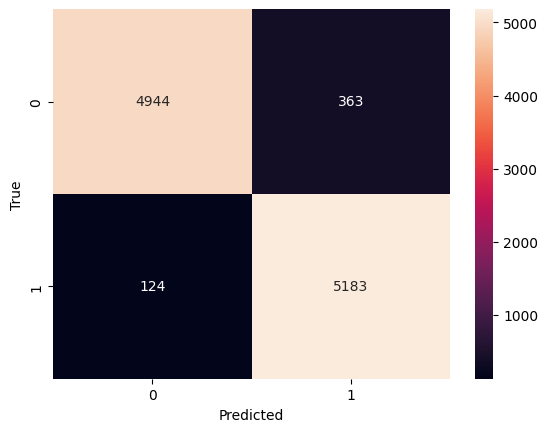

In [ ]:
import seaborn as sns

cm = confusion_matrix(y_tr, y_tr_predict)
sns.heatmap(cm, annot=True, fmt='d')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

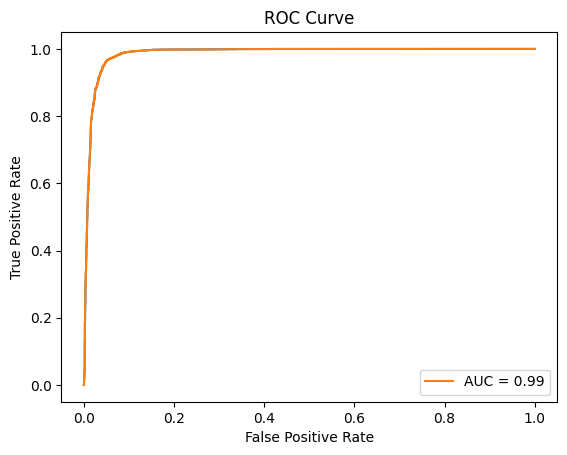

In [ ]:
# ROC Curve
from sklearn.metrics import roc_curve, roc_auc_score
fpr, tpr, thresholds = roc_curve(y_tr, SS_classifier.predict_proba(X_new)[:, 1])

# Calcular a área sob a curva ROC (AUC)
auc = roc_auc_score(y_tr, SS_classifier.predict_proba(X_new)[:, 1])

plt.plot(fpr, tpr)
plt.plot(fpr, tpr, label=f'AUC = {auc:.2f}')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc='lower right')
plt.show()


# Random Forest

In [ ]:
#hyper optimization
parameters = {
    'n_estimators': [100, 500, 1000],
    'max_depth': [None, 5, 10],
    'min_samples_split': [2, 5, 10]
}

RF_classifier = RandomForestClassifier(random_state=42)

grid_search = GridSearchCV(RF_classifier, parameters, scoring='f1', cv=5)

grid_search.fit(X_tr[:, 4:], y_tr)

best_params_RF = grid_search.best_params_
best_params_RF

{'max_depth': None, 'min_samples_split': 2, 'n_estimators': 500}

In [ ]:
RF_classifier = RandomForestClassifier(random_state=42, max_depth=None, min_samples_split=5, n_estimators=100)
sum_SS_f1=0
scores_rf = []
mccs_rf = []
f1s_rf = []
recls_ss = []  # Inicialização da lista de recall
precisions_ss = []  # Inicialização da lista de precision
n=0

for train_index, test_index in s.split(X_tr, y_tr):
    positive = 0
    negative = 0
    for i in range(y_tr.shape[0]):
        if y_tr[i] == 1:
            positive += 1
        else:
            negative += 1
    print('Positive samples:', positive)
    print('Negative samples:', negative)

    X_RF_train, X_RF_test, y_RF_train, y_RF_test = X_tr[train_index,2:], X_tr[test_index,2:], y_tr[train_index], y_tr[test_index]

    X_RF_train_new = X_RF_train
    X_RF_train_new = min_max_scaler.fit_transform(X_RF_train_new)

    X_RF_test_new = X_RF_test
    X_RF_test_new = min_max_scaler.transform(X_RF_test_new)

    RF_classifier.fit(X_RF_train_new, y_RF_train)
    scores_rf.append(RF_classifier.score(X_RF_test_new, y_RF_test))
    y_pred = RF_classifier.predict(X_RF_test_new)
    mcc = matthews_corrcoef(y_RF_test, y_pred)
    mccs_rf.append(mcc)
    f1 = f1_score(y_RF_test, y_pred)
    f1s_rf.append(f1)
    recall = recall_score(y_RF_test, y_pred)
    recls_ss.append(recall)  # Armazenamento do recall
    precision = precision_score(y_RF_test, y_pred)
    precisions_ss.append(precision)  # Armazenamento do precision

print("----------------------------------------")
print("Scores: ", np.min(scores_rf), np.max(scores_rf), np.std(scores_rf))
print("F1s: ", np.min(f1s_rf), np.max(f1s_rf), np.std(f1s_rf))
print("MCCs: ", np.min(mccs_rf), np.max(mccs_rf), np.std(mccs_rf))
print("avg cross-validation accuracy:", (sum(scores_rf) / 10))
print("avg cross-validation f1:", (sum(f1s_rf) / 10))
print("avg cross-validation mcc:", (sum(mccs_rf) / 10))
#recall = recall_score(y_tr, y_tr_predict)
print('Recall on Train set: ', recall)
#precision = precision_score(y_tr, y_tr_predict)
print('Precision on Train set: ', precision)


Positive samples: 5307
Negative samples: 5307
Positive samples: 5307
Negative samples: 5307
Positive samples: 5307
Negative samples: 5307
Positive samples: 5307
Negative samples: 5307
Positive samples: 5307
Negative samples: 5307
Positive samples: 5307
Negative samples: 5307
Positive samples: 5307
Negative samples: 5307
Positive samples: 5307
Negative samples: 5307
Positive samples: 5307
Negative samples: 5307
Positive samples: 5307
Negative samples: 5307
----------------------------------------
Scores:  0.9839924670433146 0.9962299717247879 0.003754218424975554
F1s:  0.9840075258701787 0.9962264150943397 0.003743196297433491
MCCs:  0.9679866506139304 0.992467016553956 0.007504316122194357
avg cross-validation accuracy: 0.9887887807934455
avg cross-validation f1: 0.988819725308689
avg cross-validation mcc: 0.9776016993148249
Recall on Train set:  0.9886792452830189
Precision on Train set:  0.9868173258003766


In [ ]:
X_new = X_tr[:,2:]
X_new = min_max_scaler.fit_transform(X_new)
RF_classifier.fit(X_new, y_tr)
y_tr_predict = RF_classifier.predict(X_new)

print('f1 on Train set: ', f1_score(y_tr, y_tr_predict))
print('MCC on Train set: ', matthews_corrcoef(y_tr, y_tr_predict))

tn, fp, fn, tp = confusion_matrix(y_tr, y_tr_predict).ravel()
print("tn, fp, tp, fn", tn, fp, tp, fn)
specificity = tn / (tn+fp)
print('Specificity on Train set(tn / (tn+fp)): ', specificity)
sensitivity = tp / (tp+fn)
print('Sensitivity on Train set(tp / (tp+fn)): ', sensitivity)
accuracy = (tp+tn) /(tp+tn+fp+fn)
print('Accuracy on Train set: ', accuracy)
recall = recall_score(y_tr, y_tr_predict)
print('Recall on Train set: ', recall)
precision = precision_score(y_tr, y_tr_predict)
print('Precision on Train set: ', precision)


f1 on Train set:  0.9997173810645313
MCC on Train set:  0.9994347266180386
tn, fp, tp, fn 5305 2 5306 1
Specificity on Train set(tn / (tn+fp)):  0.9996231392500471
Sensitivity on Train set(tp / (tp+fn)):  0.9998115696250236
Accuracy on Train set:  0.9997173544375353
Recall on Train set:  0.9998115696250236
Precision on Train set:  0.9996232102486813


In [ ]:
X_te_new = X_te[:,2:]
X_te_new = min_max_scaler.transform(X_te_new)
y_RF_pred=RF_classifier.predict(X_te_new)

print("*************************************")
print('f1 on Test set: ', f1_score(y_te, y_RF_pred))
print('MCC on Test set: ', matthews_corrcoef(y_te, y_RF_pred))
tn, fp, fn, tp = confusion_matrix(y_te, y_RF_pred).ravel()
print("tn, fp, tp, fn", tn, fp, tp, fn)
specificity = tn / (tn+fp)
print('Specificity on Test set(tn / (tn+fp)): ', specificity)
sensitivity = tp / (tp+fn)
print('Sensitivity on Test set(tp / (tp+fn)): ', sensitivity)
accuracy = (tp+tn) /(tp+tn+fp+fn)
print('Accuracy on Test set: ', accuracy)
precision=tp/(tp+fp)
print("Precision on Test set: ", precision)
recall = recall_score(y_te, y_RF_pred)
print('Recall on Test set: ', recall)

*************************************
f1 on Test set:  0.9857250187828701
MCC on Test set:  0.9713954567559319
tn, fp, tp, fn 653 11 656 8
Specificity on Test set(tn / (tn+fp)):  0.983433734939759
Sensitivity on Test set(tp / (tp+fn)):  0.9879518072289156
Accuracy on Test set:  0.9856927710843374
Precision on Test set:  0.9835082458770614
Recall on Test set:  0.9879518072289156


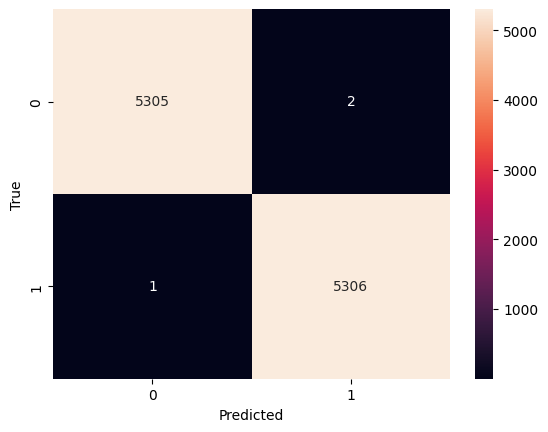

In [ ]:
import seaborn as sns

cm = confusion_matrix(y_tr, y_tr_predict)
sns.heatmap(cm, annot=True, fmt='d')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

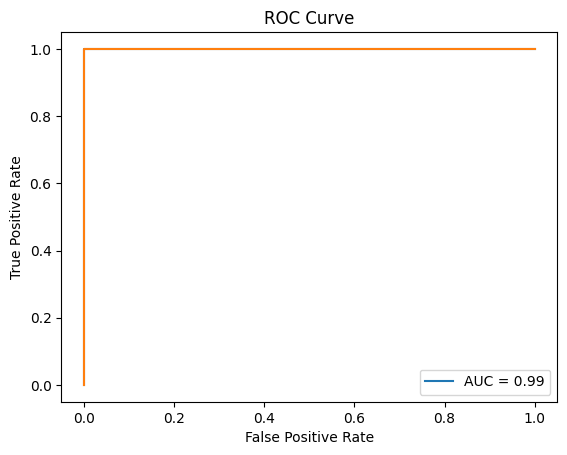

In [ ]:
# ROC Curve
from sklearn.metrics import roc_curve, roc_auc_score
fpr, tpr, thresholds = roc_curve(y_tr, RF_classifier.predict_proba(X_new)[:,1:])
plt.plot(fpr, tpr, label=f'AUC = {auc:.2f}')
plt.plot(fpr, tpr)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc='lower right')
plt.show()


# Naive Bayes:

In [ ]:
X_tr[:,4:]

array([[269.0, 6.32, 4.089, ..., 0.37, 0.0, 0.0],
       [14.0, 0.0, 50.0, ..., 0.0, 0.0, 0.0],
       [77.0, 9.091, 0.0, ..., 0.0, 0.0, 0.0],
       ...,
       [328.0, 11.28, 2.134, ..., 0.0, 0.61, 0.0],
       [331.0, 7.553, 0.906, ..., 0.0, 0.0, 0.3],
       [156.0, 0.641, 3.846, ..., 0.0, 0.65, 0.0]], dtype=object)

In [ ]:
# hyperparaeters:

parameters = {
    'var_smoothing': [1e-12,1e-10,1e-9, 1e-8, 1e-7,1e-5]
}

NB_classifier = GaussianNB()

grid_search = GridSearchCV(NB_classifier, parameters, scoring='f1', cv=5)
grid_search.fit(X_tr[:, 4:], y_tr)

best_params_NB = grid_search.best_params_
best_params_NB

{'var_smoothing': 1e-10}

In [ ]:
NB_classifier = GaussianNB(var_smoothing=1e-10)

sum_nb_f1=0
scores_nb = []
mccs_nb = []
f1s_nb = []
recls_ss = []  # Inicialização da lista de recall
precisions_ss = []  # Inicialização da lista de precision
n=0

for train_index, test_index in s.split(X_tr, y_tr):
    positive = 0
    negative = 0
    for i in range(y_tr.shape[0]):
        if y_tr[i] == 1:
            positive += 1
        else:
            negative += 1
    print('Positive samples:', positive)
    print('Negative samples:', negative)

    X_NB_train, X_NB_test, y_NB_train, y_NB_test = X_tr[train_index,2:], X_tr[test_index,2:], y_tr[train_index], y_tr[test_index]

    X_NB_train_new = X_NB_train
    X_NB_train_new = min_max_scaler.fit_transform(X_NB_train_new)

    X_NB_test_new = X_NB_test
    X_NB_test_new = min_max_scaler.transform(X_NB_test_new)

    NB_classifier.fit(X_NB_train_new, y_NB_train)
    scores_nb.append(NB_classifier.score(X_NB_test_new, y_NB_test))
    y_pred = NB_classifier.predict(X_NB_test_new)
    mcc = matthews_corrcoef(y_NB_test, y_pred)
    mccs_nb.append(mcc)
    f1 = f1_score(y_NB_test, y_pred)
    f1s_nb.append(f1)
    recall = recall_score(y_NB_test, y_pred)
    recls_ss.append(recall)  # Armazenamento do recall
    precision = precision_score(y_NB_test, y_pred)
    precisions_ss.append(precision)  # Armazenamento do precision

print("----------------------------------------")
print("Scores: ", np.min(scores_nb), np.max(scores_nb), np.std(scores_nb))
print("F1s: ", np.min(f1s_nb), np.max(f1s_nb), np.std(f1s_nb))
print("MCCs: ", np.min(mccs_nb), np.max(mccs_nb), np.std(mccs_nb))
print("avg cross-validation accuracy:", (sum(scores_nb) / 10))
print("avg cross-validation f1:", (sum(f1s_nb) / 10))
print("avg cross-validation mcc:", (sum(mccs_nb) / 10))
print("avg cross-validation recall:", np.mean(recls_ss))
print("avg cross-validation precision:", np.mean(precisions_ss))


Positive samples: 5307
Negative samples: 5307
Positive samples: 5307
Negative samples: 5307
Positive samples: 5307
Negative samples: 5307
Positive samples: 5307
Negative samples: 5307
Positive samples: 5307
Negative samples: 5307
Positive samples: 5307
Negative samples: 5307
Positive samples: 5307
Negative samples: 5307
Positive samples: 5307
Negative samples: 5307
Positive samples: 5307
Negative samples: 5307
Positive samples: 5307
Negative samples: 5307
----------------------------------------
Scores:  0.9472693032015066 0.963276836158192 0.004807411036822868
F1s:  0.948905109489051 0.9639222941720629 0.004625825263084654
MCCs:  0.8963780048265925 0.9271473845766232 0.009440232523659975
avg cross-validation accuracy: 0.9551535257041734
avg cross-validation f1: 0.9559092645324199
avg cross-validation mcc: 0.9109008745104383
avg cross-validation recall: 0.9721124258252498
avg cross-validation precision: 0.9403041987430806


Train:

In [ ]:
X_new = X_tr[:,2:]
X_new = min_max_scaler.fit_transform(X_new)
NB_classifier.fit(X_new, y_tr)
y_tr_predict = NB_classifier.predict(X_new)

print('f1 on Train set: ', f1_score(y_tr, y_tr_predict))
print('MCC on Train set: ', matthews_corrcoef(y_tr, y_tr_predict))

tn, fp, fn, tp = confusion_matrix(y_tr, y_tr_predict).ravel()
print("tn, fp, tp, fn", tn, fp, tp, fn)
specificity = tn / (tn+fp)
print('Specificity on Train set(tn / (tn+fp)): ', specificity)
sensitivity = tp / (tp+fn)
print('Sensitivity on Train set(tp / (tp+fn)): ', sensitivity)
accuracy = (tp+tn) /(tp+tn+fp+fn)
print('Accuracy on Train set: ', accuracy)
recall = recall_score(y_tr, y_tr_predict)
print('Recall on Train set: ', recall)
precision = precision_score(y_tr, y_tr_predict)
print('Precision on Train set: ', {precision:.4f})

f1 on Train set:  0.955627605372858
MCC on Train set:  0.9102714238771341
tn, fp, tp, fn 4977 330 5158 149
Specificity on Train set(tn / (tn+fp)):  0.9378179762577727
Sensitivity on Train set(tp / (tp+fn)):  0.9719238741285096
Accuracy on Train set:  0.9548709251931411
Recall on Train set:  0.9719238741285096
Precision on Train set:  0.939868804664723


ver se funciona {loss:.4f}


Teste:

In [ ]:
X_te_new = X_te[:,2:]
X_te_new = min_max_scaler.transform(X_te_new)
y_NB_pred = NB_classifier.predict(X_te_new)

In [ ]:
print("*************************************")
print('f1 on Test set: ', f1_score(y_te, y_NB_pred))
print('MCC on Test set: ', matthews_corrcoef(y_te, y_NB_pred))
tn, fp, fn, tp = confusion_matrix(y_te, y_NB_pred).ravel()
print("tn, fp, tp, fn", tn, fp, tp, fn)
specificity = tn / (tn + fp)
print('Specificity on Test set(tn / (tn+fp)): ', specificity)
sensitivity = tp / (tp + fn)
print('Sensitivity on Test set(tp / (tp+fn)): ', sensitivity)
accuracy = (tp + tn) / (tp + tn + fp + fn)
print('Accuracy on Test set: ', accuracy)
precision=tp/(tp+fp)
print("Precision on Test set: ", precision)
recall = recall_score(y_te, y_NB_pred)
print('Recall on Test set: ', recall)


*************************************
f1 on Test set:  0.9592290585618978
MCC on Test set:  0.9176277115961279
tn, fp, tp, fn 626 38 647 17
Specificity on Test set(tn / (tn+fp)):  0.9427710843373494
Sensitivity on Test set(tp / (tp+fn)):  0.9743975903614458
Accuracy on Test set:  0.9585843373493976
Precision on Test set:  0.9445255474452555
Recall on Test set:  0.9743975903614458


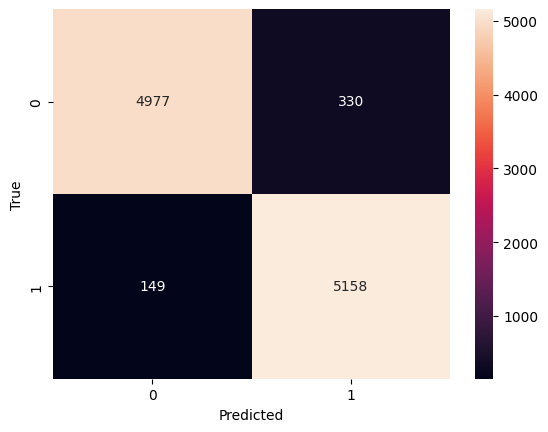

In [ ]:
import seaborn as sns

cm = confusion_matrix(y_tr, y_tr_predict)
sns.heatmap(cm, annot=True, fmt='d')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

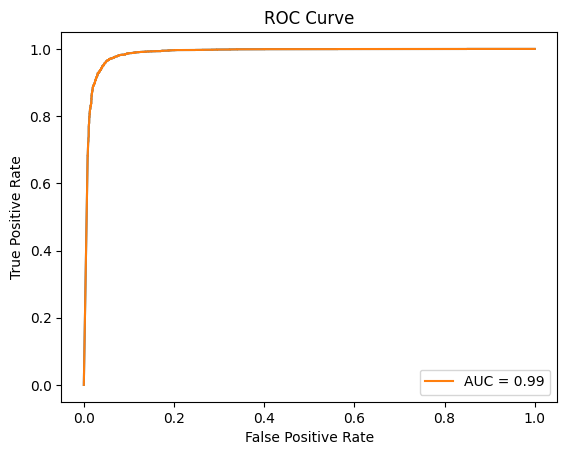

In [ ]:
# ROC Curve
from sklearn.metrics import roc_curve, roc_auc_score
fpr, tpr, thresholds = roc_curve(y_tr, NB_classifier.predict_proba(X_new)[:, 1])
plt.plot(fpr, tpr)
plt.plot(fpr, tpr, label=f'AUC = {auc:.2f}')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc='lower right')
plt.show()

# Deep Learning:



In [ ]:
pip install keras-tuner


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 129.1/129.1 kB 3.3 MB/s eta 0:00:00


In [ ]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import keras_tuner as kt
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping
from tensorflow.keras.layers import Dense, LSTM, Conv1D,Conv2D, Flatten, MaxPool1D,MaxPool2D, Dropout, Input,GRU
from tensorflow.keras.layers import Conv1D, MaxPooling1D, Flatten, Dense, Dropout, Input

In [ ]:
# Carregar os dados
import pandas as pd

df = pd.read_csv('/content/article_data_features (1).csv')

In [ ]:
df

,Identifier,Sequence,Function,length,A,R,N,D,C,E,...,VL,VK,VM,VF,VP,VS,VT,VW,VY,VV
0,FTEAMP00000001,VDKPPYLPRPTPPRRIYNNR,AMP,20.0,0.000,20.000,10.000,5.000,0.000,0.000,...,0.0,0.00,0.0,0.00,0.00,0.0,0.00,0.0,0.0,0.00
1,FTEAMP00000002,GLFKGKKKNKKTK,AMP,13.0,0.000,0.000,7.692,0.000,0.000,0.000,...,0.0,0.00,0.0,0.00,0.00,0.0,0.00,0.0,0.0,0.00
2,FTEAMP00000003,FLGVVFKLASKVFKAVFGKV,AMP,20.0,10.000,0.000,0.000,0.000,0.000,0.000,...,0.0,0.00,0.0,15.79,0.00,0.0,0.00,0.0,0.0,5.26
3,FTEAMP00000004,RIWVIKRR,AMP,8.0,0.000,37.500,0.000,0.000,0.000,0.000,...,0.0,0.00,0.0,0.00,0.00,0.0,0.00,0.0,0.0,0.00
4,FTEAMP00000005,RLARIVVIRVDR,AMP,12.0,8.333,33.333,0.000,8.333,0.000,0.000,...,0.0,0.00,0.0,0.00,0.00,0.0,0.00,0.0,0.0,9.09
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5893,NONFTEAMP00002720,FSRLGIKLAETHNKGYRWQHEAVIALA,non-AMP,27.0,14.815,7.407,3.704,0.000,0.000,7.407,...,0.0,0.00,0.0,0.00,0.00,0.0,0.00,0.0,0.0,0.00
5894,NONFTEAMP00002721,QQCRRPLYCRRRKALAALAKKILWSHPQFEK,non-AMP,31.0,12.903,16.129,0.000,0.000,6.452,3.226,...,0.0,0.00,0.0,0.00,0.00,0.0,0.00,0.0,0.0,0.00
5895,NONFTEAMP00002722,CGETCTLGTCYTAGCSCSWPVCTRNGVPI,non-AMP,29.0,3.448,3.448,3.448,0.000,20.690,3.448,...,0.0,0.00,0.0,0.00,3.57,0.0,0.00,0.0,0.0,0.00
5896,NONFTEAMP00002723,HCKFWA,non-AMP,6.0,16.667,0.000,0.000,0.000,16.667,0.000,...,0.0,0.00,0.0,0.00,0.00,0.0,0.00,0.0,0.0,0.00


label encoder

In [ ]:
# Criando uma instância do LabelEncoder
label_encoder = LabelEncoder()
df['Function'] = label_encoder.fit_transform(df['Function'])

In [ ]:
df

,Identifier,Sequence,Function,length,A,R,N,D,C,E,...,VL,VK,VM,VF,VP,VS,VT,VW,VY,VV
0,FTEAMP00000001,VDKPPYLPRPTPPRRIYNNR,0,20.0,0.000,20.000,10.000,5.000,0.000,0.000,...,0.0,0.00,0.0,0.00,0.00,0.0,0.00,0.0,0.0,0.00
1,FTEAMP00000002,GLFKGKKKNKKTK,0,13.0,0.000,0.000,7.692,0.000,0.000,0.000,...,0.0,0.00,0.0,0.00,0.00,0.0,0.00,0.0,0.0,0.00
2,FTEAMP00000003,FLGVVFKLASKVFKAVFGKV,0,20.0,10.000,0.000,0.000,0.000,0.000,0.000,...,0.0,0.00,0.0,15.79,0.00,0.0,0.00,0.0,0.0,5.26
3,FTEAMP00000004,RIWVIKRR,0,8.0,0.000,37.500,0.000,0.000,0.000,0.000,...,0.0,0.00,0.0,0.00,0.00,0.0,0.00,0.0,0.0,0.00
4,FTEAMP00000005,RLARIVVIRVDR,0,12.0,8.333,33.333,0.000,8.333,0.000,0.000,...,0.0,0.00,0.0,0.00,0.00,0.0,0.00,0.0,0.0,9.09
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5893,NONFTEAMP00002720,FSRLGIKLAETHNKGYRWQHEAVIALA,1,27.0,14.815,7.407,3.704,0.000,0.000,7.407,...,0.0,0.00,0.0,0.00,0.00,0.0,0.00,0.0,0.0,0.00
5894,NONFTEAMP00002721,QQCRRPLYCRRRKALAALAKKILWSHPQFEK,1,31.0,12.903,16.129,0.000,0.000,6.452,3.226,...,0.0,0.00,0.0,0.00,0.00,0.0,0.00,0.0,0.0,0.00
5895,NONFTEAMP00002722,CGETCTLGTCYTAGCSCSWPVCTRNGVPI,1,29.0,3.448,3.448,3.448,0.000,20.690,3.448,...,0.0,0.00,0.0,0.00,3.57,0.0,0.00,0.0,0.0,0.00
5896,NONFTEAMP00002723,HCKFWA,1,6.0,16.667,0.000,0.000,0.000,16.667,0.000,...,0.0,0.00,0.0,0.00,0.00,0.0,0.00,0.0,0.0,0.00


In [ ]:
#para experimentar usar apenas uma pequena parte do dataset, quando necessário apenas

#from sklearn.model_selection import train_test_split

#label_column = 'Function'

#subset_size = 0.1 #10% do dataset original
#_, df = train_test_split(df, test_size=subset_size, stratify=df[label_column])

Encoding:

In [ ]:
enconde_df = Encoding(dataset= df ,  col= 'Sequence')
enconde_df.result

,ID_x,Sequence,Function,length,A,R,N,D,C,E,...,VL,VK,VM,VF,VP,VS,VT,VW,VY,VV
0,FTEAMP00000001,VDKPPYLPRPTPPRRIYNNR,0,20.0,0.000,20.000,10.000,5.000,0.000,0.000,...,0.0,0.00,0.0,0.00,0.00,0.00,0.0,0.00,0.0,0.00
1,FTEAMP00000002,GLFKGKKKNKKTK,0,13.0,0.000,0.000,7.692,0.000,0.000,0.000,...,0.0,0.00,0.0,0.00,0.00,0.00,0.0,0.00,0.0,0.00
2,FTEAMP00000003,FLGVVFKLASKVFKAVFGKV,0,20.0,10.000,0.000,0.000,0.000,0.000,0.000,...,0.0,0.00,0.0,15.79,0.00,0.00,0.0,0.00,0.0,5.26
3,FTEAMP00000004,RIWVIKRR,0,8.0,0.000,37.500,0.000,0.000,0.000,0.000,...,0.0,0.00,0.0,0.00,0.00,0.00,0.0,0.00,0.0,0.00
4,FTEAMP00000005,RLARIVVIRVDR,0,12.0,8.333,33.333,0.000,8.333,0.000,0.000,...,0.0,0.00,0.0,0.00,0.00,0.00,0.0,0.00,0.0,9.09
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
22609,NONFTRAMP00010893,GTGTHPTTTMCIRALEKTVQ,1,20.0,5.000,5.000,0.000,0.000,5.000,5.000,...,0.0,0.00,0.0,0.00,0.00,0.00,0.0,0.00,0.0,0.00
22610,NONFTRAMP00010894,LHLRSETSTFETPLGAKTLPEDEETPEQEMEETPCRELEEEEEWGS...,1,206.0,4.854,9.223,3.398,3.398,5.825,9.709,...,0.0,0.49,0.0,0.00,0.49,0.98,0.0,0.49,0.0,0.49
22611,NONFTRAMP00010897,VVKDLETAGDGPRDWPSDVAQIETNSPSLTPIQ,1,33.0,6.061,3.030,3.030,12.121,0.000,6.061,...,0.0,3.12,0.0,0.00,0.00,0.00,0.0,0.00,0.0,3.12
22612,NONFTRAMP00010898,HRDIKSDNILLSLDGNIKLTDF,1,22.0,0.000,4.545,9.091,18.182,0.000,0.000,...,0.0,0.00,0.0,0.00,0.00,0.00,0.0,0.00,0.0,0.00


One_hot_encoding

In [ ]:
hot_encoded = enconde_df.get_hot_encoded()
#print(hot_encoded['One_hot_encoding'][0].shape)
print(hot_encoded['One_hot_encoding'])

/usr/local/lib/python3.10/dist-packages/joblib/externals/loky/backend/fork_exec.py:38: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  pid = os.fork()


0        [[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,...
1        [[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0,...
2        [[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,...
3        [[0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,...
4        [[0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,...
                               ...                        
22609    [[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0,...
22610    [[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,...
22611    [[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,...
22612    [[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,...
22613    [[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,...
Name: One_hot_encoding, Length: 22614, dtype: object


In [ ]:
tamanho_maximo = df['length'].max()
tamanho_maximo

692.0

In [ ]:
tamanho_medio = df['length'].mean()
tamanho_medio

28.98925444414964

One_hot_encoding e pad_seques:

In [ ]:
enconde_df = Encoding(dataset= df ,  col= 'Sequence')

res = enconde_df.get_pad_and_hot_encoding(seq_len=692)
res

In [ ]:
# Usar só as colunas Function, pad_sequence e one_hot encoding


data = res.loc[:, ['Function','pad_seques','One_hot_encoding']]


# Exibir o DataFrame resultante
print(data)

In [ ]:
#salvar dataframe
data.to_csv("/content/article_data_completo_one_hot_encoding.csv", index=False, encoding="utf-8")

Divisão teste e treino

In [ ]:
from sklearn.model_selection import train_test_split

expanded_arrays = data['One_hot_encoding'].apply(lambda x: np.array(x))
X = np.array(expanded_arrays.tolist())


# X = np.array(res['One_hot_encoding'].apply(lambda x: np.array(x[0])))
y = data['Function']

X_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)
print('train_x', X_train.shape)
print('test_x', x_test.shape)

# CNN

Adicionar "callbacks" como o early stopping e modelCheckpoint:

In [ ]:
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential, load_model
from tensorflow.keras.layers import Dense, LSTM, Conv1D,Conv2D, Flatten, MaxPool1D,MaxPool2D, Dropout, Input,GRU
from tensorflow.keras.layers import Embedding, Bidirectional
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping

# Defenir os callbacks
checkpoint = ModelCheckpoint(filepath='best_model.h5', save_best_only=True, monitor='val_accuracy', mode='max')
early_stopping = EarlyStopping(monitor='val_loss', patience=20, restore_best_weights=True)

Definir Métricas Personalizadas:

In [ ]:
import tensorflow as tf
from tensorflow.keras import backend as K

def recall_m(y_true, y_pred):
    true_positives = K.sum(K.round(K.clip(y_true * y_pred, 0, 1)))
    possible_positives = K.sum(K.round(K.clip(y_true, 0, 1)))
    recall = true_positives / (possible_positives + K.epsilon())
    return recall

def precision_m(y_true, y_pred):
    true_positives = K.sum(K.round(K.clip(y_true * y_pred, 0, 1)))
    predicted_positives = K.sum(K.round(K.clip(y_pred, 0, 1)))
    precision = true_positives / (predicted_positives + K.epsilon())
    return precision

def f1_m(y_true, y_pred):
    precision = precision_m(y_true, y_pred)
    recall = recall_m(y_true, y_pred)
    return 2 * ((precision * recall) / (precision + recall + K.epsilon()))

Construção do modelo:

In [ ]:
model = Sequential([
    Input(shape=(691, 21)),
    Conv1D(filters=64, kernel_size=3, activation='relu'),
    MaxPool1D(pool_size=2),
    Conv1D(filters=128, kernel_size=3, activation='relu'),
    MaxPool1D(pool_size=2),
    Flatten(),
    Dense(128, activation='relu'),
    Dropout(0.2),
    Dense(64, activation='relu'),
    Dropout(0.2),
    Dense(1, activation='sigmoid')
])

Compilar o modelo

In [ ]:
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy']) #isto é como está no exemplo

Compilar o modelo com as metricas personalizadas:

In [ ]:
model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy', f1_m, precision_m, recall_m])

Treinar o modelo

In [ ]:
history = model.fit(X_train, y_train, batch_size=64, epochs=100, validation_split=0.2,callbacks=[checkpoint, early_stopping])

Epoch 1/100
59/59 [==============================] - 20s 306ms/step - loss: 0.6898 - accuracy: 0.5641 - f1_m: 0.2954 - precision_m: 0.4910 - recall_m: 0.2504 - val_loss: 0.6766 - val_accuracy: 0.5614 - val_f1_m: 0.3829 - val_precision_m: 0.6118 - val_recall_m: 0.2844
Epoch 2/100


/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


59/59 [==============================] - 15s 250ms/step - loss: 0.6385 - accuracy: 0.6380 - f1_m: 0.5229 - precision_m: 0.6508 - recall_m: 0.4722 - val_loss: 0.6310 - val_accuracy: 0.6335 - val_f1_m: 0.6126 - val_precision_m: 0.6328 - val_recall_m: 0.6019
Epoch 3/100
59/59 [==============================] - 13s 218ms/step - loss: 0.5968 - accuracy: 0.6921 - f1_m: 0.6025 - precision_m: 0.7204 - recall_m: 0.5294 - val_loss: 0.6106 - val_accuracy: 0.6663 - val_f1_m: 0.6182 - val_precision_m: 0.7008 - val_recall_m: 0.5596
Epoch 4/100
59/59 [==============================] - 17s 286ms/step - loss: 0.5617 - accuracy: 0.7128 - f1_m: 0.6294 - precision_m: 0.7520 - recall_m: 0.5579 - val_loss: 0.5975 - val_accuracy: 0.6748 - val_f1_m: 0.6314 - val_precision_m: 0.7042 - val_recall_m: 0.5792
Epoch 5/100
59/59 [==============================] - 12s 212ms/step - loss: 0.5271 - accuracy: 0.7342 - f1_m: 0.6571 - precision_m: 0.7892 - recall_m: 0.5860 - val_loss: 0.5985 - val_accuracy: 0.6801 - val_f1

Evaluate the model on the test data

In [ ]:
#loss, accuracy = model.evaluate(x_test, y_test)
loss, accuracy, f1_score, precision, recall = model.evaluate(x_test, y_test)

37/37 [==============================] - 1s 26ms/step - loss: 0.5712 - accuracy: 0.7025 - f1_m: 0.6500 - precision_m: 0.7016 - recall_m: 0.6220


In [ ]:
loss, accuracy, f1_score, precision, recall = model.evaluate(x_test, y_test)

# Impressão dos resultados
print('--------------------------------')
print("Mean Training Accuracy:", np.mean(history.history['accuracy']))
print("Mean Validation Accuracy:", np.mean(history.history['val_accuracy']))
print("Mean Training Loss:", np.mean(history.history['loss']))
print("Mean Validation Loss:", np.mean(history.history['val_loss']))
print("Mean Training F1 Score:", np.mean(history.history['f1_m']))
print("Mean Validation F1 Score:", np.mean(history.history['val_f1_m']))
print("Mean Training Precision:", np.mean(history.history['precision_m']))
print("Mean Validation Precision:", np.mean(history.history['val_precision_m']))
print("Mean Training Recall:", np.mean(history.history['recall_m']))
print("Mean Validation Recall:", np.mean(history.history['val_recall_m']))
print('--------------------------------')

print(f"Test Loss: {loss:.4f}")
print(f"Test Accuracy: {accuracy:.4f}")
print(f"Test F1 Score: {f1_score:.4f}")
print(f"Test Precision: {precision:.4f}")
print(f"Test Recall: {recall:.4f}")

37/37 [==============================] - 1s 26ms/step - loss: 0.5712 - accuracy: 0.7025 - f1_m: 0.6500 - precision_m: 0.7016 - recall_m: 0.6220
--------------------------------
Mean Training Accuracy: 0.8708267137408257
Mean Validation Accuracy: 0.6646363039811453
Mean Training Loss: 0.26909874627987546
Mean Validation Loss: 1.0397523442904155
Mean Training F1 Score: 0.8332708229621252
Mean Validation F1 Score: 0.6268911845982075
Mean Training Precision: 0.8826704521973928
Mean Validation Precision: 0.6892278045415878
Mean Training Recall: 0.8063865080475807
Mean Validation Recall: 0.5882092912991842
--------------------------------
Test Loss: 0.5712
Test Accuracy: 0.7025
Test F1 Score: 0.6500
Test Precision: 0.7016
Test Recall: 0.6220


In [ ]:
print('===================================')
print("Mean Training Accuracy:", np.mean(history.history['accuracy']))
print("Mean Validation Accuracy:", np.mean(history.history['val_accuracy']))
print("Mean Training Loss:", np.mean(history.history['loss']))
print("Mean Validation Loss:", np.mean(history.history['val_loss']))

print('===================================')

print(f"Test Loss: {loss:.4f}")
print(f"Test Accuracy: {accuracy:.4f}") #este é como está no exemplo


Mean Training Accuracy: 0.8714216145185324
Mean Validation Accuracy: 0.6685792070168716
Mean Training Loss: 0.26154877718251485
Mean Validation Loss: 1.0488862853783827
Test Loss: 0.5747
Test Accuracy: 0.6929


In [ ]:
# converte essas probabilidades em previsões binárias (0 ou 1) usando um limiar de 0.5.

y_pred = model.predict(x_test)
y_pred_classes = (y_pred > 0.5).astype("int32")  # Convertendo previsões para classes binárias

print(y_pred_classes[:10])  # Exibindo as primeiras 10 previsões

37/37 [==============================] - 1s 27ms/step
[[0]
 [0]
 [0]
 [0]
 [0]
 [1]
 [1]
 [0]
 [1]
 [0]]


Calcular MCC

In [ ]:
from sklearn.metrics import matthews_corrcoef

# Obter previsões do modelo
y_pred_prob = model.predict(x_test)
y_pred = (y_pred_prob > 0.5).astype(int)

# Calcular MCC
mcc = matthews_corrcoef(y_test, y_pred)

print(f"Test MCC: {mcc:.4f}")

37/37 [==============================] - 1s 26ms/step
Test MCC: 0.3982


Gráficos:

Curvas de Aprendizado

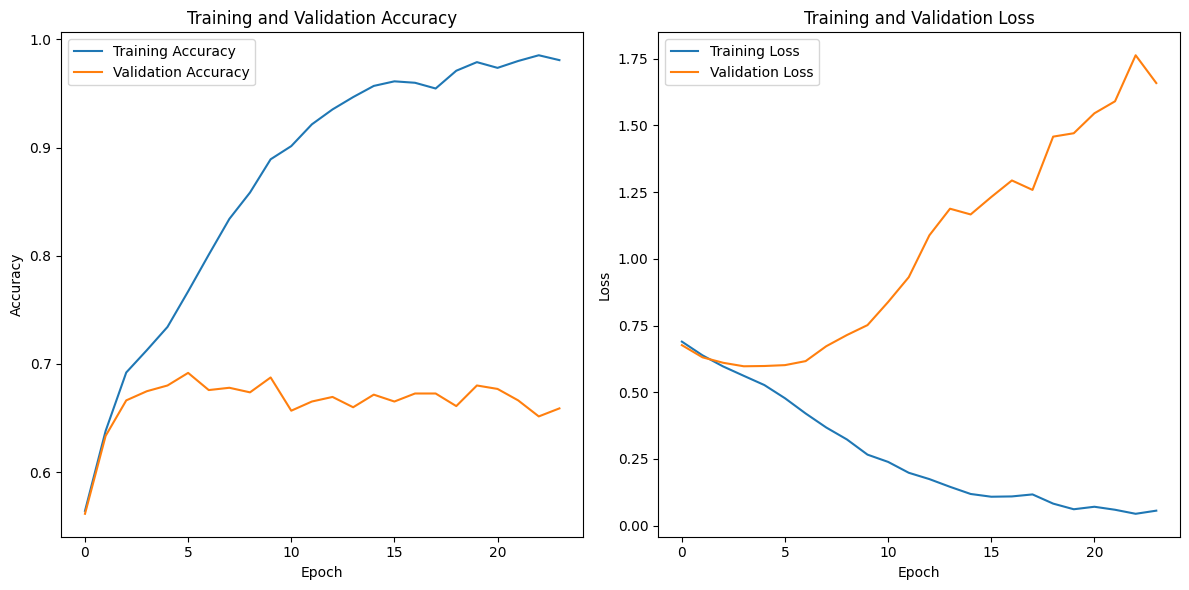

In [ ]:
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.tight_layout()
plt.show()

Matriz de Confusão


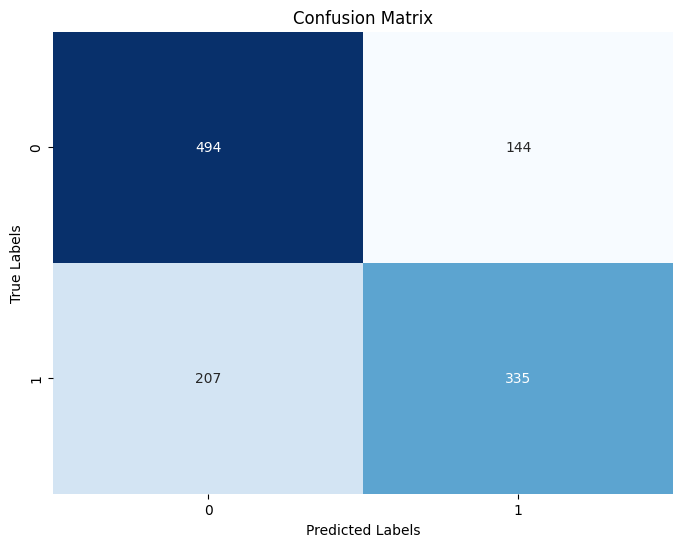

In [ ]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)

# Plotar a matriz de confusão
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.title('Confusion Matrix')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.show()

Curva ROC e ROC-AUC

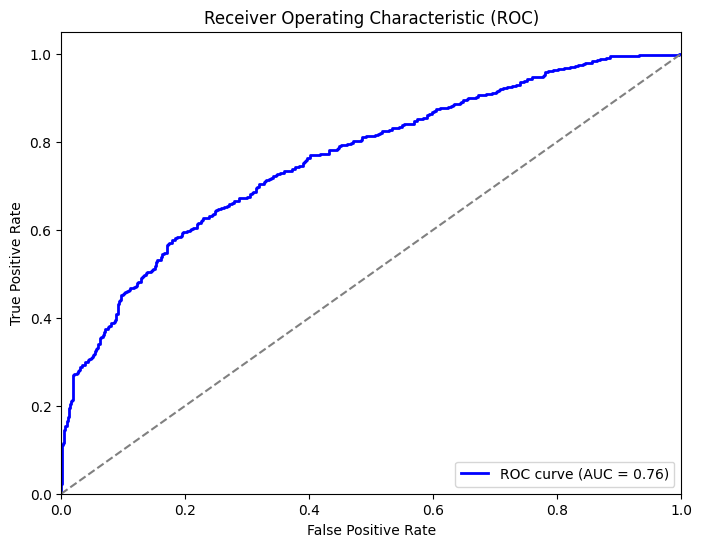

In [ ]:
# Calcular a curva ROC e o AUC
from sklearn.metrics import roc_curve, auc

fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)
roc_auc = auc(fpr, tpr)

# Plotar a curva ROC
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', lw=2, label='ROC curve (AUC = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC)')
plt.legend(loc='lower right')
plt.show()

Configurar o Tuner:

Nota- fazer no final, ainda não fiz

In [ ]:
# Configura o tuner

tuner = kt.Hyperband(
    build_model,
    objective='val_accuracy',
    max_epochs=50,
    hyperband_iterations=2,
    directory='my_dir',
    project_name='dense_hyperparameter_tuning',
)

In [ ]:
#Prepare os dados para serem utilizados com Keras, convertendo-os para tensores.

In [ ]:
import tensorflow as tf

train_dataset = tf.data.Dataset.from_tensor_slices((X_train, y_train)).batch(32)
#val_dataset = tf.data.Dataset.from_tensor_slices((X_val, y_val)).batch(32)


 Executar o Tuning, metodo search:

In [ ]:
# Preparar os dados para o Keras
train_dataset = tf.data.Dataset.from_tensor_slices((X_train, y_train)).batch(32)
val_dataset = tf.data.Dataset.from_tensor_slices((X_test, y_test)).batch(32)

# Executar a busca de hiperparâmetros
tuner.search(train_dataset, epochs=50, validation_data=val_dataset)

# Recuperar os melhores hiperparâmetros
best_hps = tuner.get_best_hyperparameters(num_trials=1)[0]

print(f"""
Os melhores hiperparâmetros são:
- Unidades na primeira camada: {best_hps.get('units1')}
- Taxa de dropout na primeira camada: {best_hps.get('dropout1')}
- Unidades na segunda camada: {best_hps.get('units2')}
- Taxa de dropout na segunda camada: {best_hps.get('dropout2')}
- Taxa de aprendizagem: {best_hps.get('learning_rate')}
""")

# Construir o modelo com os melhores hiperparâmetros
best_model = tuner.hypermodel.build(best_hps)

# Treinar o melhor modelo
best_model.fit(train_dataset, epochs=50, validation_data=val_dataset)

# Avaliar o modelo no conjunto de teste
test_dataset = tf.data.Dataset.from_tensor_slices((X_test, y_test)).batch(32)
loss, accuracy = best_model.evaluate(test_dataset)
print(f'Test accuracy: {accuracy}')


Trial 80 Complete [00h 01m 09s]
val_accuracy: 0.7093220353126526

Best val_accuracy So Far: 0.7186440825462341
Total elapsed time: 00h 15m 31s

Search: Running Trial #81

Value             |Best Value So Far |Hyperparameter
128               |448               |units1
0.3               |0.1               |dropout1
512               |416               |units2
0.4               |0                 |dropout2
0.0044689         |0.00087192        |learning_rate
50                |17                |tuner/epochs
0                 |6                 |tuner/initial_epoch
0                 |2                 |tuner/bracket
0                 |1                 |tuner/round

Epoch 1/50
148/148 [==============================] - 2s 9ms/step - loss: 11.9993 - accuracy: 0.5212 - val_loss: 0.6877 - val_accuracy: 0.5551
Epoch 2/50
148/148 [==============================] - 1s 8ms/step - loss: 0.6929 - accuracy: 0.5617 - val_loss: 0.6750 - val_accuracy: 0.5415
Epoch 3/50
148/148 [=======================

KeyboardInterrupt: 

 Avaliar os Melhores Hiperparâmetros

In [ ]:
best_hps = tuner.get_best_hyperparameters(num_trials=1)[0]

print(f"""
Os melhores hiperparâmetros são:
- Unidades na primeira camada: {best_hps.get('units1')}
- Taxa de dropout na primeira camada: {best_hps.get('dropout1')}
- Unidades na segunda camada: {best_hps.get('units2')}
- Taxa de dropout na segunda camada: {best_hps.get('dropout2')}
- Taxa de aprendizagem: {best_hps.get('learning_rate')}
""")

# Construir o modelo com os melhores hiperparâmetros
best_model = tuner.hypermodel.build(best_hps)

# Treinar o melhor modelo
best_model.fit(train_dataset, epochs=50, validation_data=val_dataset)


Avaliar o Modelo no Conjunto de Teste


In [ ]:
test_dataset = tf.data.Dataset.from_tensor_slices((X_test, y_test)).batch(32)
loss, accuracy = best_model.evaluate(test_dataset)
print(f'Test accuracy: {accuracy}')


# RNN

a RNN - GRU based model

In [ ]:
model = Sequential([
    Input(shape=(691, 21)),
    GRU(units=32, return_sequences=True),
    Flatten(),
    Dense(8, activation='relu'),
    Dropout(0.2),
    Dense(1, activation='sigmoid')
])


Epoch 1/100
59/59 [==============================] - 31s 448ms/step - loss: 0.7179 - accuracy: 0.5323 - val_loss: 0.6945 - val_accuracy: 0.5106
Epoch 2/100
59/59 [==============================] - 21s 363ms/step - loss: 0.6894 - accuracy: 0.5485 - val_loss: 0.6917 - val_accuracy: 0.5106
Epoch 3/100
59/59 [==============================] - 21s 356ms/step - loss: 0.6851 - accuracy: 0.5485 - val_loss: 0.6911 - val_accuracy: 0.5106
Epoch 4/100
59/59 [==============================] - 21s 359ms/step - loss: 0.6804 - accuracy: 0.5485 - val_loss: 0.6834 - val_accuracy: 0.5106
Epoch 5/100
59/59 [==============================] - 21s 360ms/step - loss: 0.6686 - accuracy: 0.5525 - val_loss: 0.6722 - val_accuracy: 0.6197
Epoch 6/100
59/59 [==============================] - 21s 360ms/step - loss: 0.6573 - accuracy: 0.6203 - val_loss: 0.6671 - val_accuracy: 0.6208
Epoch 7/100
59/59 [==============================] - 21s 363ms/step - loss: 0.6539 - accuracy: 0.6229 - val_loss: 0.6630 - val_accuracy:

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


59/59 [==============================] - 21s 353ms/step - loss: 0.4628 - accuracy: 0.7711 - val_loss: 0.6124 - val_accuracy: 0.6833
Epoch 36/100
59/59 [==============================] - 21s 359ms/step - loss: 0.4639 - accuracy: 0.7682 - val_loss: 0.6161 - val_accuracy: 0.6822
Epoch 37/100
59/59 [==============================] - 21s 351ms/step - loss: 0.4528 - accuracy: 0.7756 - val_loss: 0.6155 - val_accuracy: 0.6748
Epoch 38/100
59/59 [==============================] - 21s 360ms/step - loss: 0.4464 - accuracy: 0.7750 - val_loss: 0.6200 - val_accuracy: 0.6801
Epoch 39/100
59/59 [==============================] - 21s 359ms/step - loss: 0.4387 - accuracy: 0.7901 - val_loss: 0.6192 - val_accuracy: 0.6737
Epoch 40/100
59/59 [==============================] - 22s 372ms/step - loss: 0.4330 - accuracy: 0.7891 - val_loss: 0.6351 - val_accuracy: 0.6769
Epoch 41/100
59/59 [==============================] - 22s 371ms/step - loss: 0.4208 - accuracy: 0.7901 - val_loss: 0.6507 - val_accuracy: 0.666

ValueError: not enough values to unpack (expected 5, got 2)

In [ ]:
model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy', f1_m, precision_m, recall_m])

In [ ]:

# Train the model
history = model.fit(X_train, y_train, batch_size=64,epochs = 100,validation_split=0.2, callbacks=[checkpoint, early_stopping])

Epoch 1/100
59/59 [==============================] - 27s 376ms/step - loss: 0.5388 - accuracy: 0.7162 - f1_m: 0.6517 - precision_m: 0.7184 - recall_m: 0.6109 - val_loss: 0.6027 - val_accuracy: 0.6790 - val_f1_m: 0.6108 - val_precision_m: 0.7521 - val_recall_m: 0.5195
Epoch 2/100
59/59 [==============================] - 22s 368ms/step - loss: 0.5251 - accuracy: 0.7334 - f1_m: 0.6724 - precision_m: 0.7502 - recall_m: 0.6199 - val_loss: 0.5932 - val_accuracy: 0.6748 - val_f1_m: 0.6307 - val_precision_m: 0.7101 - val_recall_m: 0.5737
Epoch 3/100
59/59 [==============================] - 23s 383ms/step - loss: 0.5233 - accuracy: 0.7244 - f1_m: 0.6682 - precision_m: 0.7282 - recall_m: 0.6246 - val_loss: 0.5912 - val_accuracy: 0.6578 - val_f1_m: 0.6242 - val_precision_m: 0.6773 - val_recall_m: 0.5838
Epoch 4/100
59/59 [==============================] - 23s 381ms/step - loss: 0.5174 - accuracy: 0.7345 - f1_m: 0.6704 - precision_m: 0.7548 - recall_m: 0.6147 - val_loss: 0.5971 - val_accuracy: 0.6

In [ ]:
# Evaluate the model on the test data
#loss, accuracy = model.evaluate(x_test, y_test)
loss, accuracy, f1_score, precision, recall = model.evaluate(x_test, y_test)

37/37 [==============================] - 4s 113ms/step - loss: 0.5777 - accuracy: 0.6941 - f1_m: 0.6443 - precision_m: 0.6858 - recall_m: 0.6214


In [ ]:
loss, accuracy, f1_score, precision, recall = model.evaluate(x_test, y_test)

# Impressão dos resultados
print('--------------------------------')
print("Mean Training Accuracy:", np.mean(history.history['accuracy']))
print("Mean Validation Accuracy:", np.mean(history.history['val_accuracy']))
print("Mean Training Loss:", np.mean(history.history['loss']))
print("Mean Validation Loss:", np.mean(history.history['val_loss']))
print("Mean Training F1 Score:", np.mean(history.history['f1_m']))
print("Mean Validation F1 Score:", np.mean(history.history['val_f1_m']))
print("Mean Training Precision:", np.mean(history.history['precision_m']))
print("Mean Validation Precision:", np.mean(history.history['val_precision_m']))
print("Mean Training Recall:", np.mean(history.history['recall_m']))
print("Mean Validation Recall:", np.mean(history.history['val_recall_m']))
print('--------------------------------')

print(f"Test Loss: {loss:.4f}")
print(f"Test Accuracy: {accuracy:.4f}")
print(f"Test F1 Score: {f1_score:.4f}")
print(f"Test Precision: {precision:.4f}")
print(f"Test Recall: {recall:.4f}")

37/37 [==============================] - 3s 70ms/step - loss: 0.5777 - accuracy: 0.6941 - f1_m: 0.6443 - precision_m: 0.6858 - recall_m: 0.6214
--------------------------------
Mean Training Accuracy: 0.7614340704420338
Mean Validation Accuracy: 0.6730840128401051
Mean Training Loss: 0.4681749797385672
Mean Validation Loss: 0.6200620013734569
Mean Training F1 Score: 0.7116935045822806
Mean Validation F1 Score: 0.6271320296370465
Mean Training Precision: 0.7766862796700519
Mean Validation Precision: 0.7101897493652676
Mean Training Recall: 0.6666690448056096
Mean Validation Recall: 0.5672181248664856
--------------------------------
Test Loss: 0.5777
Test Accuracy: 0.6941
Test F1 Score: 0.6443
Test Precision: 0.6858
Test Recall: 0.6214


In [ ]:

# Obter previsões do modelo
y_pred_prob = model.predict(x_test)
y_pred = (y_pred_prob > 0.5).astype(int)

# Calcular MCC
mcc = matthews_corrcoef(y_test, y_pred)

print(f"Test MCC: {mcc:.4f}")

37/37 [==============================] - 2s 56ms/step
Test MCC: 0.3811


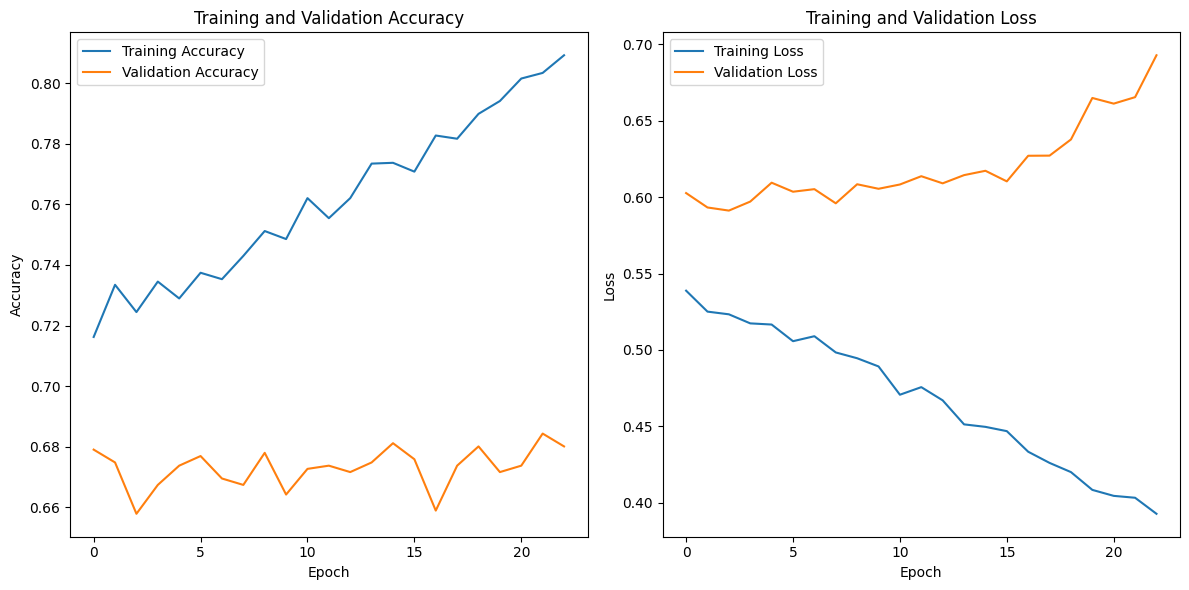

In [ ]:
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.tight_layout()
plt.show()

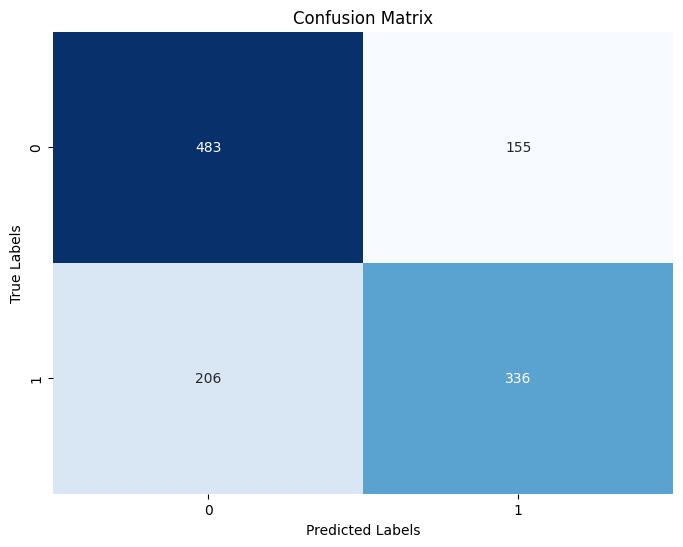

In [ ]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)

# Plotar a matriz de confusão
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.title('Confusion Matrix')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.show()

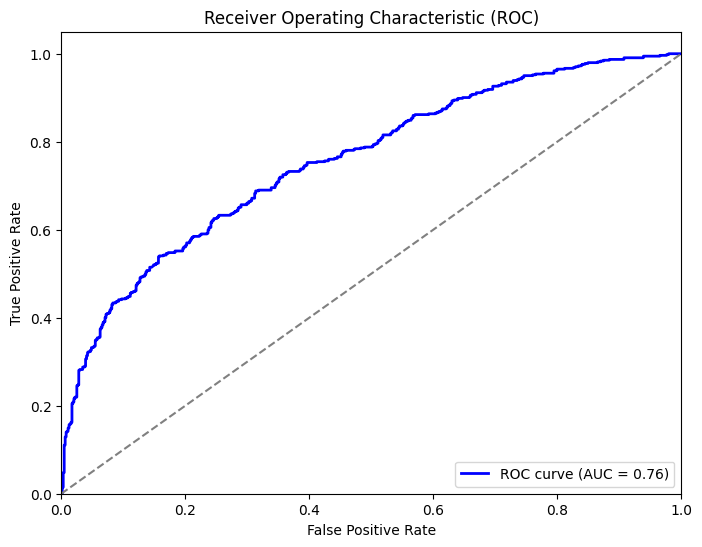

In [ ]:
# Calcular a curva ROC e o AUC
from sklearn.metrics import roc_curve, auc

fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)
roc_auc = auc(fpr, tpr)

# Plotar a curva ROC
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', lw=2, label='ROC curve (AUC = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC)')
plt.legend(loc='lower right')
plt.show()